In [1]:
# --------- General Data Science Libraries ------
import pandas as pd
import numpy as np
# --------- Visualization Libraries ---------
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# --------- Machine Learning Libraries ---------
from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif as mu_clsf
from sklearn.model_selection import cross_val_score

clustering para ver como agrupar y a partir de ahi cuantos modelos entrenar
univariado ->quitar outliers con algun metodo agrupando por cultivo por ejm
multivariado -> distancia de mahalanobis,

Evaluar la calidad del modelo de regresión Naive Bayes usando las métricas para problemas de regresion:


*   error cuadrático medio (MSE)
*    coeficiente de determinación (R^2)
*  error absoluto medio (MAE)

***Nota:*** El MSE y el MAE miden la diferencia entre las predicciones del modelo y los valores reales en términos de unidades cuadradas y unidades absolutas, respectivamente, mientras que R^2 mide la proporción de la varianza en los datos explicada por el modelo.



In [2]:
#Importación de dataset desde Github
url = 'https://raw.githubusercontent.com/Marianod2003/Proyectogrupo21/main/estimaciones-agricolas-2020-08.csv'
df_agricola = pd.read_csv(url, encoding='utf-8')

In [3]:
df_agricola

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campa�a,campa�a,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,854,25 de Mayo,1,Ajo,2,1970/1971,1,1,3,3000
2,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/1970,15,15,82,5467
3,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,2,1970/1971,10,10,55,5500
4,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,3,1971/1972,8,8,44,5500
...,...,...,...,...,...,...,...,...,...,...,...,...
143625,54,Misiones,112,San Pedro,31,Yerba mate,46,2014/2015,7975,7905,43478,5500
143626,54,Misiones,112,San Pedro,31,Yerba mate,47,2015/2016,7975,7905,46640,5900
143627,54,Misiones,112,San Pedro,31,Yerba mate,48,2016/2017,8200,8200,33620,4100
143628,54,Misiones,112,San Pedro,31,Yerba mate,49,2017/2018,8787,8787,43054,4900


In [4]:
#Eliminacion de columnas que no me sirven para realizar la predicción con ML
df_agricola = df_agricola.drop(columns={'id_provincia', 'id_departamento', 'id_campa�a', 'id_cultivo', 'campa�a'}, axis=1)

In [5]:
df_agricola

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
0,Buenos Aires,25 de Mayo,Ajo,3,3,10,3333
1,Buenos Aires,25 de Mayo,Ajo,1,1,3,3000
2,Buenos Aires,Adolfo Gonzales Chaves,Ajo,15,15,82,5467
3,Buenos Aires,Adolfo Gonzales Chaves,Ajo,10,10,55,5500
4,Buenos Aires,Adolfo Gonzales Chaves,Ajo,8,8,44,5500
...,...,...,...,...,...,...,...
143625,Misiones,San Pedro,Yerba mate,7975,7905,43478,5500
143626,Misiones,San Pedro,Yerba mate,7975,7905,46640,5900
143627,Misiones,San Pedro,Yerba mate,8200,8200,33620,4100
143628,Misiones,San Pedro,Yerba mate,8787,8787,43054,4900


In [6]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

## **MAIZ**

### Filtro de cultivo **"Maiz"** para separar del dataset original y obtener **df_agricola_maiz**

In [ ]:
filtro = (df_agricola['produccion '] != 0) & (df_agricola['cultivo'] == 'Ma�z')
df_agricola_maiz = df_agricola[filtro]
df_agricola_maiz

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
63287,Buenos Aires,25 de Mayo,Ma�z,36000,33000,102300,3100
63288,Buenos Aires,25 de Mayo,Ma�z,55000,49000,161700,3300
63289,Buenos Aires,25 de Mayo,Ma�z,42000,38000,76000,2000
63290,Buenos Aires,25 de Mayo,Ma�z,40000,10000,33000,3300
63291,Buenos Aires,25 de Mayo,Ma�z,28000,28000,84000,3000
...,...,...,...,...,...,...,...
79205,Tucuman,Trancas,Ma�z,750,270,1890,7000
79206,Tucuman,Trancas,Ma�z,750,350,2415,6900
79207,Tucuman,Trancas,Ma�z,750,240,1800,7500
79208,Tucuman,Trancas,Ma�z,700,400,3120,7800


In [ ]:
estadisticos_cont(df_agricola_maiz.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
sup_sembrada,15404.0,13170.121722,4000.0,28153.228145,2.0,980.0,4000.0,15000.0,558000.0
sup_cosechada,15404.0,10610.789146,3000.0,24670.500338,2.0,600.0,3000.0,10700.0,499860.0
produccion,15404.0,53225.974098,9127.5,146768.952268,2.0,1300.0,9127.5,42000.0,3399048.0
rendimiento,15404.0,3561.020254,3000.0,2311.489694,97.0,1750.0,3000.0,5000.0,33333.0


### **A)** Limpieza de outliers para **df_agricola_maiz**

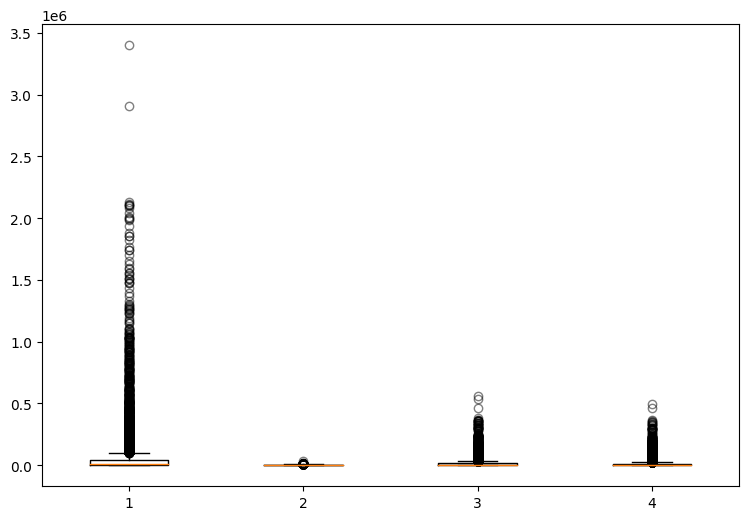

In [ ]:
datos_1 = df_agricola_maiz['produccion ']
datos_2 = df_agricola_maiz['rendimiento']
datos_3 = df_agricola_maiz['sup_sembrada']
datos_4 = df_agricola_maiz['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

* #### Eliminación de outliers de la columna **"produccion"**

In [ ]:
#Z-scores se utilizan comúnmente para identificar valores extremos o atípicos en un conjunto de datos
#Aplico la fórmula de Z score para la reducción de valores extremos
z_scores_produccion= (df_agricola_maiz['produccion '] - df_agricola_maiz['produccion '].mean()) / df_agricola_maiz['produccion '].std()
z_scores_produccion

63287    0.334362
63288    0.739080
63289    0.155169
63290   -0.137808
63291    0.209677
           ...   
79205   -0.349774
79206   -0.346197
79207   -0.350387
79208   -0.341394
79209   -0.359245
Name: produccion , Length: 15404, dtype: float64

* #### Eliminación de outliers de la columna **"rendimiento"**

In [ ]:
z_scores_rendimiento= (df_agricola_maiz['rendimiento'] - df_agricola_maiz['rendimiento'].mean()) / df_agricola_maiz['rendimiento'].std()
z_scores_rendimiento

63287   -0.199447
63288   -0.112923
63289   -0.675331
63290   -0.112923
63291   -0.242709
           ...   
79205    1.487776
79206    1.444514
79207    1.704087
79208    1.833874
79209    0.622533
Name: rendimiento, Length: 15404, dtype: float64

* #### Eliminación de outliers de la columna **"superficie sembrada"**

In [ ]:
z_scores_sembrada= (df_agricola_maiz['sup_sembrada'] - df_agricola_maiz['sup_sembrada'].mean()) / df_agricola_maiz['sup_sembrada'].std()
z_scores_sembrada

63287    0.810915
63288    1.485793
63289    1.024035
63290    0.952995
63291    0.526756
           ...   
79205   -0.441162
79206   -0.441162
79207   -0.441162
79208   -0.442938
79209   -0.464249
Name: sup_sembrada, Length: 15404, dtype: float64

* #### Eliminación de outliers de la columna **"superficie cosechada"**

In [ ]:
z_scores_cosechada= (df_agricola_maiz['sup_cosechada'] - df_agricola_maiz['sup_cosechada'].mean()) / df_agricola_maiz['sup_cosechada'].std()
z_scores_cosechada

63287    0.907530
63288    1.556078
63289    1.110201
63290   -0.024758
63291    0.704858
           ...   
79205   -0.419156
79206   -0.415913
79207   -0.420372
79208   -0.413887
79209   -0.426047
Name: sup_cosechada, Length: 15404, dtype: float64

In [15]:
columnas_a_filtrar = ['produccion ', 'sup_sembrada', 'sup_cosechada', 'rendimiento']

In [ ]:
umbral_z_score = 1.96  # El umbral que deseas utilizar

for columna in columnas_a_filtrar:
    z_scores = (df_agricola_maiz[columna] - df_agricola_maiz[columna].mean()) / df_agricola_maiz[columna].std()
    df_agricola_maiz = df_agricola_maiz[np.abs(z_scores) < umbral_z_score]

In [ ]:
df_agricola_maiz

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
63292,Buenos Aires,25 de Mayo,Ma�z,28000,17000,41800,2459
63304,Buenos Aires,25 de Mayo,Ma�z,14000,14000,50400,3600
63305,Buenos Aires,25 de Mayo,Ma�z,15000,13000,54600,4200
63306,Buenos Aires,25 de Mayo,Ma�z,15000,13200,43000,3258
63307,Buenos Aires,25 de Mayo,Ma�z,15000,14000,55000,3929
...,...,...,...,...,...,...,...
79204,Tucuman,Trancas,Ma�z,700,300,1950,6500
79205,Tucuman,Trancas,Ma�z,750,270,1890,7000
79206,Tucuman,Trancas,Ma�z,750,350,2415,6900
79207,Tucuman,Trancas,Ma�z,750,240,1800,7500


In [ ]:
estadisticos_cont(df_agricola_maiz.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
sup_sembrada,12524.0,5642.327212,2600.0,6961.567287,2.0,600.0,2600.0,8000.0,37700.0
sup_cosechada,12524.0,4032.317231,2000.0,4872.031114,2.0,450.0,2000.0,6000.0,20500.0
produccion,12524.0,14890.696423,4700.0,22753.495298,2.0,840.0,4700.0,19250.0,150590.0
rendimiento,12524.0,2955.251118,2600.0,1753.746082,97.0,1500.0,2600.0,4000.0,7505.0


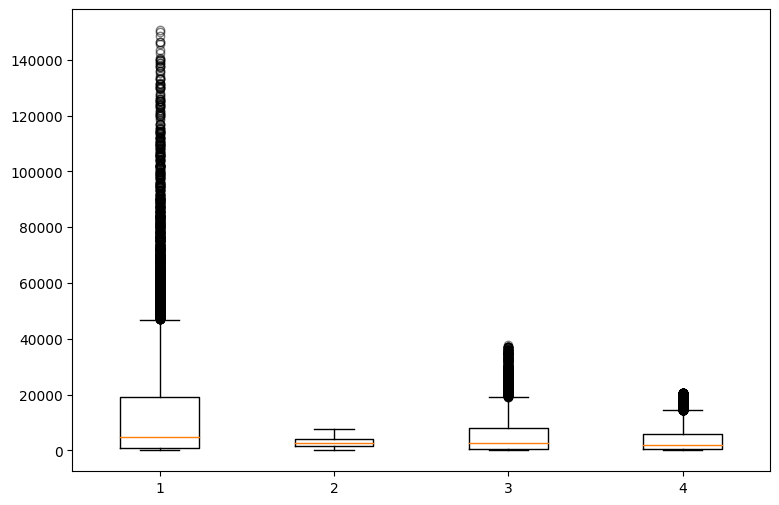

In [ ]:
datos_1 = df_agricola_maiz['produccion ']
datos_2 = df_agricola_maiz['rendimiento']
datos_3 = df_agricola_maiz['sup_sembrada']
datos_4 = df_agricola_maiz['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

### **B)** Machine Learning

La variable objetivo a predecir es **"produccion"**

*   Primero antes de continuar los pasos siguientes vamos a utilizar el LabelEncoder para transformar nuestras variables categóricas **(columnas: "provincia", "departamento" y "cultivo")** en variables numéricas



In [ ]:
#Realizo label encoder para las tres columnas: "provincia", "departamento", "cultivo"
label_encoder_provincia = LabelEncoder()
label_encoder_departamento = LabelEncoder()
label_encoder_cultivo = LabelEncoder()


df_agricola_maiz['provincia'] = label_encoder_provincia.fit_transform(df_agricola_maiz['provincia'])
df_agricola_maiz['departamento'] = label_encoder_departamento.fit_transform(df_agricola_maiz['departamento'])
df_agricola_maiz['cultivo'] = label_encoder_cultivo.fit_transform(df_agricola_maiz['cultivo'])

In [ ]:
#Muestro los resultados que apliqué label encoder a las columnas mencionadas anteriormente
df_agricola_maiz

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
63292,0,3,0,28000,17000,41800,2459
63304,0,3,0,14000,14000,50400,3600
63305,0,3,0,15000,13000,54600,4200
63306,0,3,0,15000,13200,43000,3258
63307,0,3,0,15000,14000,55000,3929
...,...,...,...,...,...,...,...
79204,20,339,0,700,300,1950,6500
79205,20,339,0,750,270,1890,7000
79206,20,339,0,750,350,2415,6900
79207,20,339,0,750,240,1800,7500


#### B-1) Separación en variables carasterísticas (features variable) y variable objetivo (target variable)

In [ ]:
X = df_agricola_maiz.drop('produccion ', axis = 1) #Variables carasteristicas o features
X = X.values
y = df_agricola_maiz['produccion '] #Variable objetivo o target

#### B-2) **MODELOS**



*   **Transformación de datos en Train e Test, aquí utilizaremos el 30% de nuestros datos para probar los modelos de aprendizaje automático.**



In [ ]:
#Crearemos las variables predictoras y objetivo para conjuntos de datos de test y training
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

***Para probar diferentes modelos, usamos todas las variables carasterísticas (no aplico feature selection)***

##### **1. Naive Bayes:** Supervised Learning Model

Ejecutando el Modelo Gaussiano: aquí usaremos el Modelo Naive Bayes, probaremos el modelo Gaussiano, usando nuestros Datos Normales

In [ ]:
#Entrenamiento y Predicción con un Modelo de Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

**Gráfico de Dispersión de Valores Reales vs. Predicciones:**

Crear un gráfico de dispersión para comparar los valores reales con las predicciones del modelo. Esto nos dará una idea visual de qué tan bien se ajustan las predicciones a los valores reales.

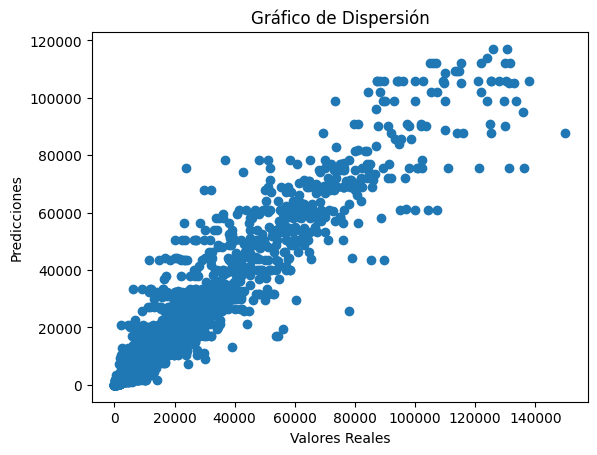

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

**Histograma de Residuos:**

Crear un histograma de los residuos, que son la diferencia entre los valores reales y las predicciones. Esto nos dará una idea de la distribución de los errores del modelo

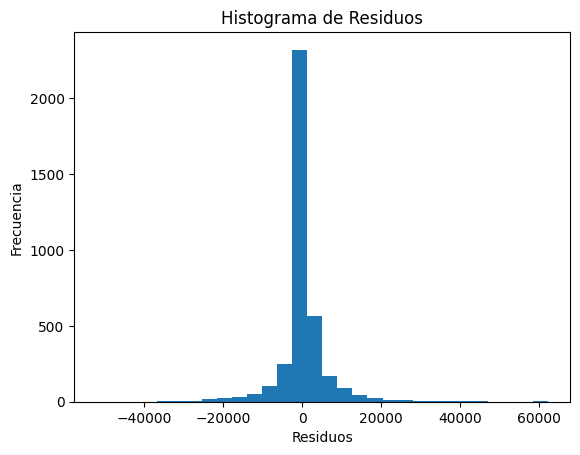

In [ ]:
residual = y_test - previsoes
plt.hist(residual, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

**Normalidad:** Además de la forma de campana, puedes utilizar pruebas estadísticas como la prueba de normalidad (por ejemplo, la prueba de Shapiro-Wilk o Anderson-Darling) para cuantificar si tus residuos siguen una distribución normal. Si la prueba de normalidad arroja un valor p pequeño (por debajo de un umbral predefinido), podría indicar que los residuos no siguen una distribución normal.

In [ ]:
from scipy import stats

residuos_transformados, _ = stats.yeojohnson(residual)

# Puedes imprimir los residuos transformados
print("Residuos transformados:", residuos_transformados)

Residuos transformados: [  883.25685242  -284.24948795  3778.26974984 ... -1070.44405675
  1384.7055891  -7180.04779355]


In [ ]:
from scipy import stats

# Realiza la prueba de Shapiro-Wilk en los residuos transformados
stat, p = stats.shapiro(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p}")

# Comprueba la hipótesis nula y decide si los residuos transformados siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("Los residuos transformados parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de prueba: 0.709396481513977
Valor p: 0.0
Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Realiza la prueba de normalidad de Anderson-Darling
result = stats.anderson(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de Anderson-Darling: {result.statistic}")
print(f"Valores críticos: {result.critical_values}")
print(f"Niveles de significancia: {result.significance_level}")

# Comprueba la hipótesis nula y decide si los residuos siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if result.statistic < result.critical_values[2]:
    print("Los residuos parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de Anderson-Darling: 366.84808564460036
Valores críticos: [0.575 0.655 0.786 0.917 1.091]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 43502499.545236826


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 3155.3600319318784


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.917266723603013


##### **2. Lineal Regression:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Regresion Lineal
lineal_reg = LinearRegression()
lineal_reg.fit(X_train, y_train)
previsoes = lineal_reg.predict(X_test)

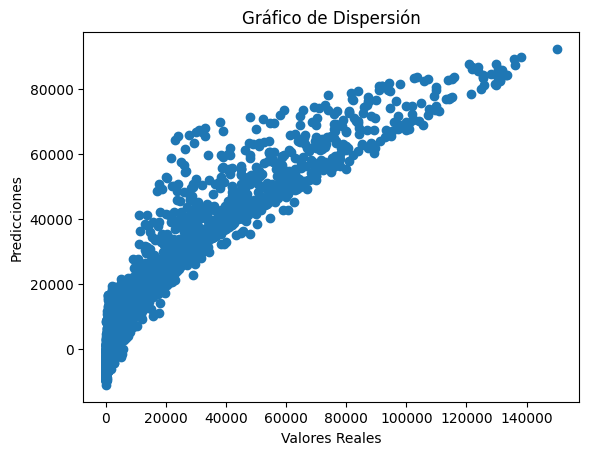

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 72326097.71648943


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 5659.211507647535


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.862449857004849


##### **3. Random Forest Regressor:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Random Forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
previsoes = rf_regressor.predict(X_test)

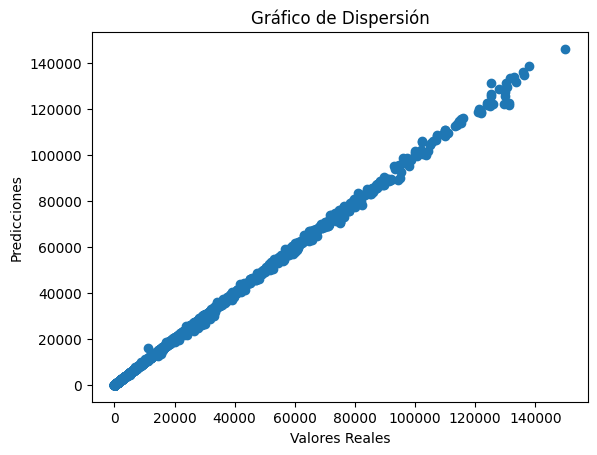

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 310995.6345764768


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 193.5394305481639


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9994085469096571


##### **4. Maquina de Soporte Vectorial (SVM):** Supervised Learning Model

In [ ]:
#Crea una instancia del modelo SVM para regresión
svr = SVR(kernel='linear')  # Puedes elegir diferentes tipos de kernel (lineal, polinomial, radial, etc.)

# Entrena el modelo en los datos de entrenamiento
svr.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = svr.predict(X_test)

Text(0.5, 1.0, 'Valores reales vs. Predicciones')

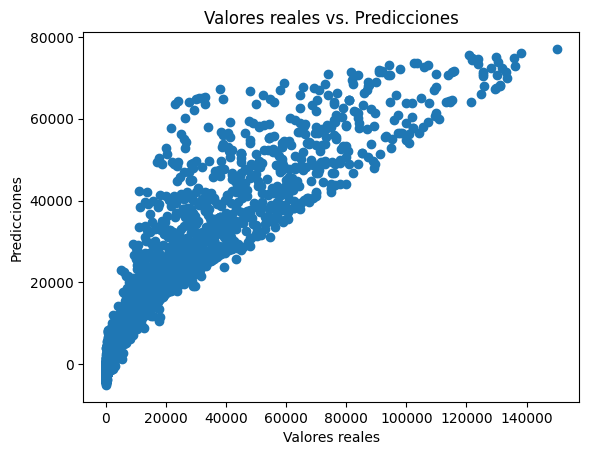

In [ ]:
# Crear un gráfico de dispersión de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 95008897.10284196


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 4962.028138700022


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.8193115929807997


## TRIGO

### Filtro de cultivo **"Trigo"** para separar del dataset original y obtener **df_agricola_trigo**

In [ ]:
filtro = (df_agricola['produccion '] != 0) & (df_agricola['cultivo'] == 'Trigo total')
df_agricola_trigo = df_agricola[filtro]
df_agricola_trigo

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
129982,Buenos Aires,25 de Mayo,Trigo total,47000,42000,71400,1700
129983,Buenos Aires,25 de Mayo,Trigo total,37000,36000,54000,1500
129984,Buenos Aires,25 de Mayo,Trigo total,30000,30000,39000,1300
129985,Buenos Aires,25 de Mayo,Trigo total,42000,41000,73600,1795
129986,Buenos Aires,25 de Mayo,Trigo total,6000,6000,9000,1500
...,...,...,...,...,...,...,...
141991,Tucuman,Trancas,Trigo total,400,300,260,867
141992,Tucuman,Trancas,Trigo total,400,400,400,1000
141993,Tucuman,Trancas,Trigo total,800,800,1000,1250
141994,Tucuman,Trancas,Trigo total,350,300,400,1333


In [ ]:
estadisticos_cont(df_agricola_trigo.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
sup_sembrada,11657.0,24188.313974,7800.0,38244.169414,2.0,1200.0,7800.0,31100.0,350000.0
sup_cosechada,11657.0,22732.592777,7000.0,36689.573770,1.0,1000.0,7000.0,29000.0,345000.0
produccion,11657.0,50185.978811,13650.0,87515.329524,1.0,1632.0,13650.0,61700.0,884440.0
rendimiento,11657.0,1992.669126,1800.0,998.465968,167.0,1250.0,1800.0,2500.0,7186.0


### Limpieza de outliers para **df_agricola_trigo**

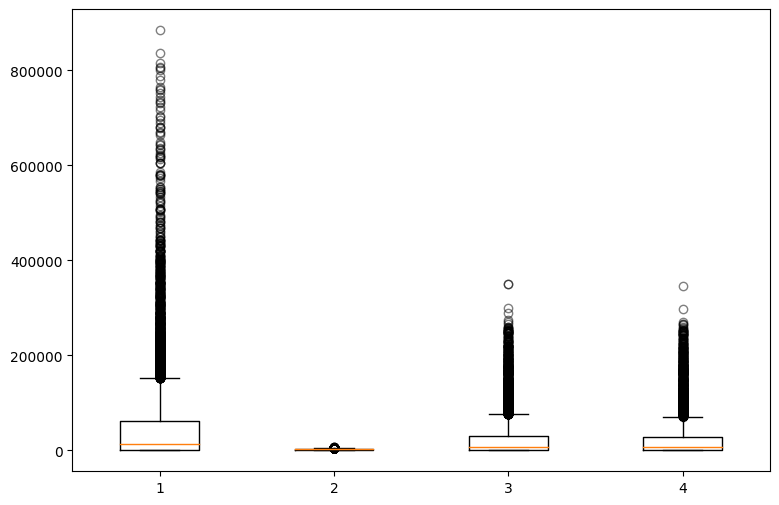

In [ ]:
datos_1 = df_agricola_trigo['produccion ']
datos_2 = df_agricola_trigo['rendimiento']
datos_3 = df_agricola_trigo['sup_sembrada']
datos_4 = df_agricola_trigo['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

* #### Eliminación de outliers de la columna **"produccion"**

In [ ]:
#Z-scores se utilizan comúnmente para identificar valores extremos o atípicos en un conjunto de datos
#Aplico la fórmula de Z score para la reducción de valores extremos
z_scores_produccion= (df_agricola_trigo['produccion '] - df_agricola_trigo['produccion '].mean()) / df_agricola_trigo['produccion '].std()
z_scores_produccion

129982    0.242403
129983    0.043581
129984   -0.127817
129985    0.267542
129986   -0.470614
            ...   
141991   -0.570483
141992   -0.568883
141993   -0.562027
141994   -0.568883
141995   -0.560884
Name: produccion , Length: 11657, dtype: float64

* #### Eliminación de outliers de la columna **"rendimiento"**

In [ ]:
z_scores_rendimiento= (df_agricola_trigo['rendimiento'] - df_agricola_trigo['rendimiento'].mean()) / df_agricola_trigo['rendimiento'].std()
z_scores_rendimiento

129982   -0.293119
129983   -0.493426
129984   -0.693733
129985   -0.197973
129986   -0.493426
            ...   
141991   -1.127399
141992   -0.994194
141993   -0.743810
141994   -0.660683
141995   -0.159914
Name: rendimiento, Length: 11657, dtype: float64

* #### Eliminación de outliers de la columna **"superficie sembrada"**

In [ ]:
z_scores_sembrada= (df_agricola_trigo['sup_sembrada'] - df_agricola_trigo['sup_sembrada'].mean()) / df_agricola_trigo['sup_sembrada'].std()
z_scores_sembrada

129982    0.596475
129983    0.334997
129984    0.151963
129985    0.465736
129986   -0.475584
            ...   
141991   -0.622012
141992   -0.622012
141993   -0.611552
141994   -0.623319
141995   -0.616782
Name: sup_sembrada, Length: 11657, dtype: float64

* #### Eliminación de outliers de la columna **"superficie cosechada"**

In [ ]:
z_scores_cosechada= (df_agricola_trigo['sup_cosechada'] - df_agricola_trigo['sup_cosechada'].mean()) / df_agricola_trigo['sup_cosechada'].std()
z_scores_cosechada

129982    0.525147
129983    0.361612
129984    0.198078
129985    0.497891
129986   -0.456059
            ...   
141991   -0.611416
141992   -0.608690
141993   -0.597788
141994   -0.611416
141995   -0.603239
Name: sup_cosechada, Length: 11657, dtype: float64

In [ ]:
umbral_z_score = 1.96  # El umbral que deseas utilizar

for columna in columnas_a_filtrar:
    z_scores = (df_agricola_trigo[columna] - df_agricola_trigo[columna].mean()) / df_agricola_trigo[columna].std()
    df_agricola_trigo = df_agricola_trigo[np.abs(z_scores) < umbral_z_score]

In [ ]:
df_agricola_trigo

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
129982,Buenos Aires,25 de Mayo,Trigo total,47000,42000,71400,1700
129983,Buenos Aires,25 de Mayo,Trigo total,37000,36000,54000,1500
129984,Buenos Aires,25 de Mayo,Trigo total,30000,30000,39000,1300
129985,Buenos Aires,25 de Mayo,Trigo total,42000,41000,73600,1795
129986,Buenos Aires,25 de Mayo,Trigo total,6000,6000,9000,1500
...,...,...,...,...,...,...,...
141991,Tucuman,Trancas,Trigo total,400,300,260,867
141992,Tucuman,Trancas,Trigo total,400,400,400,1000
141993,Tucuman,Trancas,Trigo total,800,800,1000,1250
141994,Tucuman,Trancas,Trigo total,350,300,400,1333


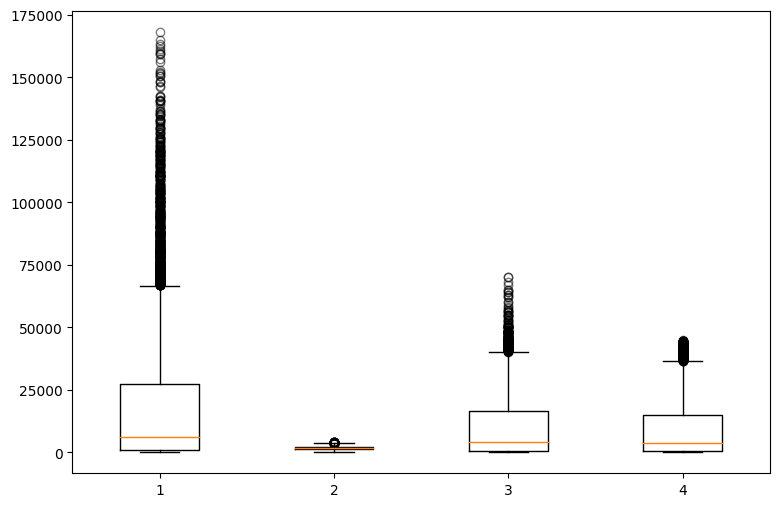

In [ ]:
datos_1_trigo = df_agricola_trigo['produccion ']
datos_2_trigo = df_agricola_trigo['rendimiento']
datos_3_trigo = df_agricola_trigo['sup_sembrada']
datos_4_trigo = df_agricola_trigo['sup_cosechada']


data = [datos_1_trigo, datos_2_trigo, datos_3_trigo, datos_4_trigo]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

### **B)** Machine Learning

La variable objetivo a predecir es **"produccion"**

*   Primero antes de continuar los pasos siguientes vamos a utilizar el LabelEncoder para transformar nuestras variables categóricas **(columnas: "provincia", "departamento" y "cultivo")** en variables numéricas



In [ ]:
#Realizo label encoder para las tres columnas: "provincia", "departamento", "cultivo"
label_encoder_provincia = LabelEncoder()
label_encoder_departamento = LabelEncoder()
label_encoder_cultivo = LabelEncoder()

df_agricola_trigo['provincia'] = label_encoder_provincia.fit_transform(df_agricola_trigo['provincia'])
df_agricola_trigo['departamento'] = label_encoder_departamento.fit_transform(df_agricola_trigo['departamento'])
df_agricola_trigo['cultivo'] = label_encoder_cultivo.fit_transform(df_agricola_trigo['cultivo'])

In [ ]:
#Muestro los resultados que apliqué label encoder a las columnas mencionadas anteriormente
df_agricola_trigo

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
129982,0,3,0,47000,42000,71400,1700
129983,0,3,0,37000,36000,54000,1500
129984,0,3,0,30000,30000,39000,1300
129985,0,3,0,42000,41000,73600,1795
129986,0,3,0,6000,6000,9000,1500
...,...,...,...,...,...,...,...
141991,20,310,0,400,300,260,867
141992,20,310,0,400,400,400,1000
141993,20,310,0,800,800,1000,1250
141994,20,310,0,350,300,400,1333


#### B-1) Separación en variables carasterísticas (features variable) y variable objetivo (target variable)

In [ ]:
X = df_agricola_trigo.drop('produccion ', axis = 1) #Variables carasteristicas o features
X = X.values
y = df_agricola_trigo['produccion '] #Variable objetivo o target

#### B-2) **MODELOS**



*   **Transformación de datos en Train e Test, aquí utilizaremos el 30% de nuestros datos para probar los modelos de aprendizaje automático.**



In [ ]:
#Crearemos las variables predictoras y objetivo para conjuntos de datos de test y training
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

***Para probar diferentes modelos, usamos todas las variables carasterísticas (no aplico feature selection)***

##### **1. Naive Bayes:** Supervised Learning Model

Ejecutando el Modelo Gaussiano: aquí usaremos el Modelo Naive Bayes, probaremos el modelo Gaussiano, usando nuestros Datos Normales

In [ ]:
#Entrenamiento y Predicción con un Modelo de Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

**Gráfico de Dispersión de Valores Reales vs. Predicciones:**

Crear un gráfico de dispersión para comparar los valores reales con las predicciones del modelo. Esto nos dará una idea visual de qué tan bien se ajustan las predicciones a los valores reales.

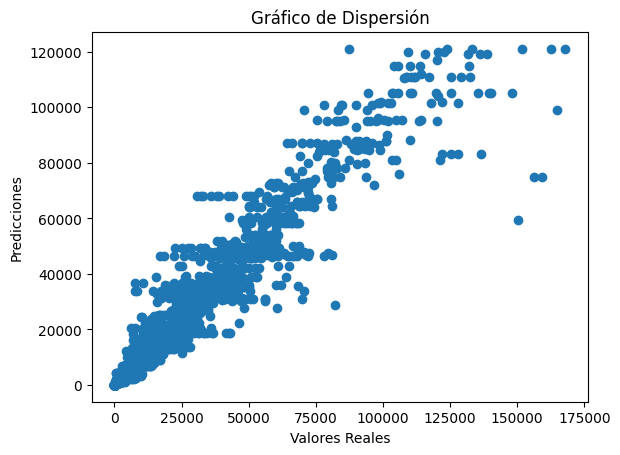

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

**Histograma de Residuos:**

Crear un histograma de los residuos, que son la diferencia entre los valores reales y las predicciones. Esto nos dará una idea de la distribución de los errores del modelo

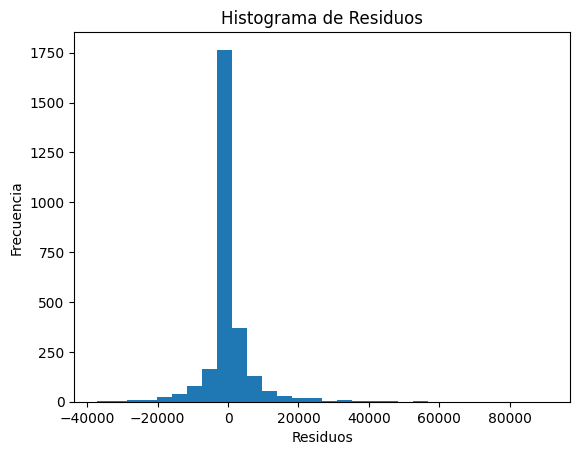

In [ ]:
residual = y_test - previsoes
plt.hist(residual, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

**Normalidad:** Además de la forma de campana, puedes utilizar pruebas estadísticas como la prueba de normalidad (por ejemplo, la prueba de Shapiro-Wilk o Anderson-Darling) para cuantificar si tus residuos siguen una distribución normal. Si la prueba de normalidad arroja un valor p pequeño (por debajo de un umbral predefinido), podría indicar que los residuos no siguen una distribución normal.

In [ ]:
from scipy import stats

residuos_transformados, _ = stats.yeojohnson(residual)

# Puedes imprimir los residuos transformados
print("Residuos transformados:", residuos_transformados)

Residuos transformados: [ -722.5498445   2020.35593495   363.29757269 ...  1041.13917051
 -6015.38823232 -2155.85092229]


In [ ]:
from scipy import stats

# Realiza la prueba de Shapiro-Wilk en los residuos transformados
stat, p = stats.shapiro(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p}")

# Comprueba la hipótesis nula y decide si los residuos transformados siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("Los residuos transformados parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de prueba: 0.6929699182510376
Valor p: 0.0
Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Realiza la prueba de normalidad de Anderson-Darling
result = stats.anderson(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de Anderson-Darling: {result.statistic}")
print(f"Valores críticos: {result.critical_values}")
print(f"Niveles de significancia: {result.significance_level}")

# Comprueba la hipótesis nula y decide si los residuos siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if result.statistic < result.critical_values[2]:
    print("Los residuos parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de Anderson-Darling: 285.4174433977437
Valores críticos: [0.575 0.655 0.786 0.917 1.09 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 54538936.18943534


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 3351.590528233151


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.927391205017975


##### **2. Lineal Regression:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Regresion Lineal
lineal_reg = LinearRegression()
lineal_reg.fit(X_train, y_train)
previsoes = lineal_reg.predict(X_test)

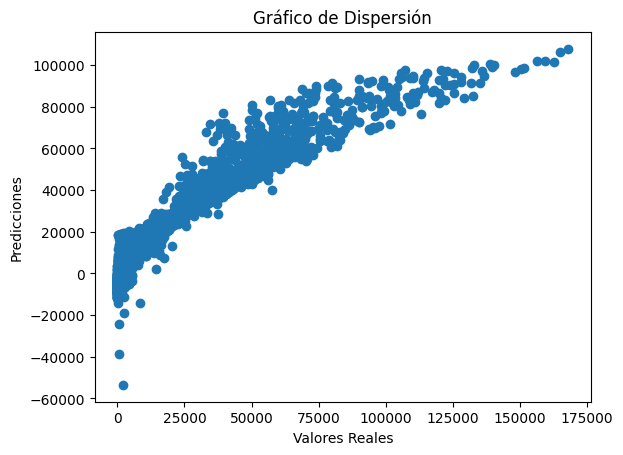

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 76943919.67695946


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 5751.174934197719


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.897562994820204


##### **3. Random Forest Regressor:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Random Forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
previsoes = rf_regressor.predict(X_test)

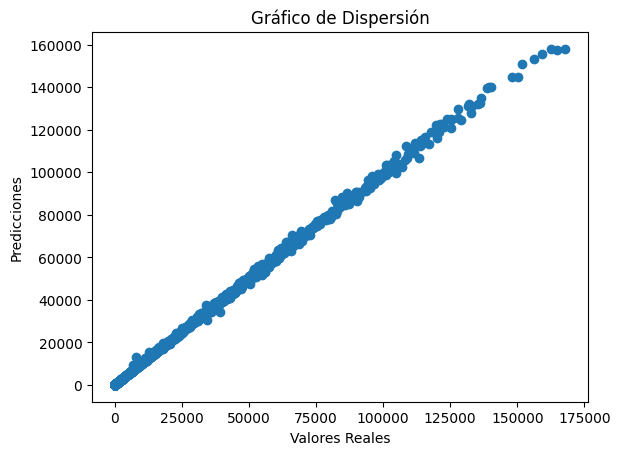

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 483471.9176460475


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 274.8903315118398


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9993563440030073


##### **4. Maquina de Soporte Vectorial (SVM):** Supervised Learning Model

In [ ]:
#Crea una instancia del modelo SVM para regresión
svr = SVR(kernel='linear')  # Puedes elegir diferentes tipos de kernel (lineal, polinomial, radial, etc.)

# Entrena el modelo en los datos de entrenamiento
svr.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = svr.predict(X_test)

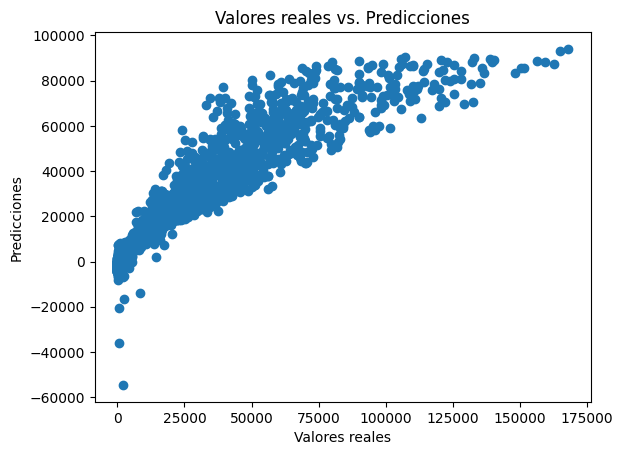

In [ ]:
# Grafica las predicciones vs. los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 94650956.53547029


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 4920.555392423678


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.8739892565182124


## SORGO

### Filtro de cultivo **"Sorgo"** para separar del dataset original y obtener **df_agricola_sorgo**

In [ ]:
filtro = (df_agricola['produccion '] != 0) & (df_agricola['cultivo'] == 'Sorgo')
df_agricola_sorgo = df_agricola[filtro]
df_agricola_sorgo

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
117548,Buenos Aires,25 de Mayo,Sorgo,3000,3000,10200,3400
117549,Buenos Aires,25 de Mayo,Sorgo,3800,3400,8100,2382
117550,Buenos Aires,25 de Mayo,Sorgo,2800,2800,8400,3000
117551,Buenos Aires,25 de Mayo,Sorgo,3000,1200,4680,3900
117552,Buenos Aires,25 de Mayo,Sorgo,7000,7000,21000,3000
...,...,...,...,...,...,...,...
128181,Tucuman,Trancas,Sorgo,220,220,1010,4591
128182,Tucuman,Trancas,Sorgo,250,250,1030,4120
128183,Tucuman,Trancas,Sorgo,300,300,1440,4800
128184,Tucuman,Trancas,Sorgo,250,250,1200,4800


In [ ]:
estadisticos_cont(df_agricola_sorgo.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
sup_sembrada,10120.0,6845.555336,2000.0,14908.035058,2.0,500.0,2000.0,6500.0,240000.0
sup_cosechada,10120.0,5554.370850,1600.0,12311.891430,2.0,450.0,1600.0,5000.0,194000.0
produccion,10120.0,18367.985474,5250.0,39889.777164,1.0,1440.0,5250.0,17020.0,873000.0
rendimiento,10120.0,3428.975889,3117.5,1501.093698,150.0,2400.0,3117.5,4200.0,13886.0


### Limpieza de outliers para **df_agricola_sorgo**

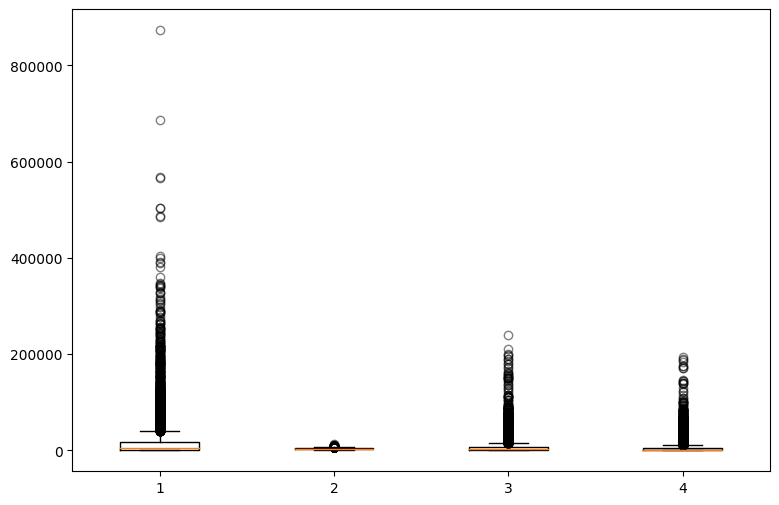

In [ ]:
datos_1_sorgo = df_agricola_sorgo['produccion ']
datos_2_sorgo = df_agricola_sorgo['rendimiento']
datos_3_sorgo = df_agricola_sorgo['sup_sembrada']
datos_4_sorgo = df_agricola_sorgo['sup_cosechada']


data = [datos_1_sorgo, datos_2_sorgo, datos_3_sorgo, datos_4_sorgo]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

* #### Eliminación de outliers de la columna **"produccion"**

In [ ]:
#Z-scores se utilizan comúnmente para identificar valores extremos o atípicos en un conjunto de datos
#Aplico la fórmula de Z score para la reducción de valores extremos
z_scores_produccion= (df_agricola_sorgo['produccion '] - df_agricola_sorgo['produccion '].mean()) / df_agricola_sorgo['produccion '].std()
z_scores_produccion

117548   -0.204764
117549   -0.257409
117550   -0.249888
117551   -0.343145
117552    0.065982
            ...   
128181   -0.435149
128182   -0.434647
128183   -0.424369
128184   -0.430386
128188   -0.447433
Name: produccion , Length: 10120, dtype: float64

* #### Eliminación de outliers de la columna **"rendimiento"**

In [ ]:
z_scores_rendimiento= (df_agricola_sorgo['rendimiento'] - df_agricola_sorgo['rendimiento'].mean()) / df_agricola_sorgo['rendimiento'].std()
z_scores_rendimiento

117548   -0.019303
117549   -0.697475
117550   -0.285776
117551    0.313787
117552   -0.285776
            ...   
128181    0.774118
128182    0.460347
128183    0.913350
128184    0.913350
128188    1.179822
Name: rendimiento, Length: 10120, dtype: float64

* #### Eliminación de outliers de la columna **"superficie sembrada"**

In [ ]:
z_scores_sembrada= (df_agricola_sorgo['sup_sembrada'] - df_agricola_sorgo['sup_sembrada'].mean()) / df_agricola_sorgo['sup_sembrada'].std()
z_scores_sembrada

117548   -0.257952
117549   -0.204290
117550   -0.271367
117551   -0.257952
117552    0.010360
            ...   
128181   -0.444428
128182   -0.442416
128183   -0.439062
128184   -0.442416
128188   -0.425647
Name: sup_sembrada, Length: 10120, dtype: float64

* #### Eliminación de outliers de la columna **"superficie cosechada"**

In [ ]:
z_scores_cosechada= (df_agricola_sorgo['sup_cosechada'] - df_agricola_sorgo['sup_cosechada'].mean()) / df_agricola_sorgo['sup_cosechada'].std()
z_scores_cosechada

117548   -0.207472
117549   -0.174983
117550   -0.223716
117551   -0.353672
117552    0.117417
            ...   
128181   -0.433270
128182   -0.430833
128183   -0.426772
128184   -0.430833
128188   -0.443016
Name: sup_cosechada, Length: 10120, dtype: float64

In [ ]:
umbral_z_score = 1.96  # El umbral que deseas utilizar

for columna in columnas_a_filtrar:
    z_scores = (df_agricola_sorgo[columna] - df_agricola_sorgo[columna].mean()) / df_agricola_sorgo[columna].std()
    df_agricola_sorgo = df_agricola_sorgo[np.abs(z_scores) < umbral_z_score]

In [ ]:
df_agricola_sorgo

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
117548,Buenos Aires,25 de Mayo,Sorgo,3000,3000,10200,3400
117549,Buenos Aires,25 de Mayo,Sorgo,3800,3400,8100,2382
117550,Buenos Aires,25 de Mayo,Sorgo,2800,2800,8400,3000
117551,Buenos Aires,25 de Mayo,Sorgo,3000,1200,4680,3900
117552,Buenos Aires,25 de Mayo,Sorgo,7000,7000,21000,3000
...,...,...,...,...,...,...,...
128181,Tucuman,Trancas,Sorgo,220,220,1010,4591
128182,Tucuman,Trancas,Sorgo,250,250,1030,4120
128183,Tucuman,Trancas,Sorgo,300,300,1440,4800
128184,Tucuman,Trancas,Sorgo,250,250,1200,4800


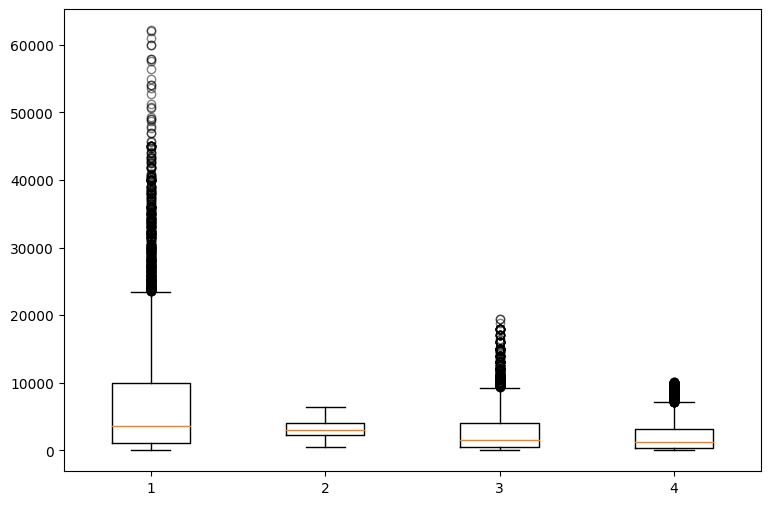

In [ ]:
datos_1_sorgo = df_agricola_sorgo['produccion ']
datos_2_sorgo = df_agricola_sorgo['rendimiento']
datos_3_sorgo = df_agricola_sorgo['sup_sembrada']
datos_4_sorgo = df_agricola_sorgo['sup_cosechada']


data = [datos_1_sorgo, datos_2_sorgo, datos_3_sorgo, datos_4_sorgo]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

### **B)** Machine Learning

La variable objetivo a predecir es **"produccion"**

*   Primero antes de continuar los pasos siguientes vamos a utilizar el LabelEncoder para transformar nuestras variables categóricas **(columnas: "provincia", "departamento" y "cultivo")** en variables numéricas



In [ ]:
#Realizo label encoder para las tres columnas: "provincia", "departamento", "cultivo"
label_encoder_provincia = LabelEncoder()
label_encoder_departamento = LabelEncoder()
label_encoder_cultivo = LabelEncoder()


df_agricola_sorgo['provincia'] = label_encoder_provincia.fit_transform(df_agricola_sorgo['provincia'])
df_agricola_sorgo['departamento'] = label_encoder_departamento.fit_transform(df_agricola_sorgo['departamento'])
df_agricola_sorgo['cultivo'] = label_encoder_cultivo.fit_transform(df_agricola_sorgo['cultivo'])

In [ ]:
#Muestro los resultados que apliqué label encoder a las columnas mencionadas anteriormente
df_agricola_sorgo

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
117548,0,3,0,3000,3000,10200,3400
117549,0,3,0,3800,3400,8100,2382
117550,0,3,0,2800,2800,8400,3000
117551,0,3,0,3000,1200,4680,3900
117552,0,3,0,7000,7000,21000,3000
...,...,...,...,...,...,...,...
128181,17,281,0,220,220,1010,4591
128182,17,281,0,250,250,1030,4120
128183,17,281,0,300,300,1440,4800
128184,17,281,0,250,250,1200,4800


#### B-1) Separación en variables carasterísticas (features variable) y variable objetivo (target variable)

In [ ]:
X = df_agricola_sorgo.drop('produccion ', axis = 1) #Variables carasteristicas o features
X = X.values
y = df_agricola_sorgo['produccion '] #Variable objetivo o target

#### B-2) **MODELOS**



*   **Transformación de datos en Train e Test, aquí utilizaremos el 30% de nuestros datos para probar los modelos de aprendizaje automático.**



In [ ]:
#Crearemos las variables predictoras y objetivo para conjuntos de datos de test y training
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

***Para probar diferentes modelos, usamos todas las variables carasterísticas (no aplico feature selection)***

##### **1. Naive Bayes:** Supervised Learning Model

Ejecutando el Modelo Gaussiano: aquí usaremos el Modelo Naive Bayes, probaremos el modelo Gaussiano, usando nuestros Datos Normales

In [ ]:
#Entrenamiento y Predicción con un Modelo de Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

**Gráfico de Dispersión de Valores Reales vs. Predicciones:**

Crear un gráfico de dispersión para comparar los valores reales con las predicciones del modelo. Esto nos dará una idea visual de qué tan bien se ajustan las predicciones a los valores reales.

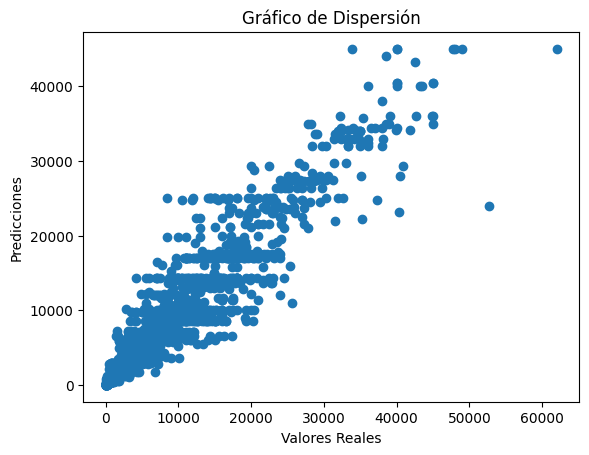

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

**Histograma de Residuos:**

Crear un histograma de los residuos, que son la diferencia entre los valores reales y las predicciones. Esto nos dará una idea de la distribución de los errores del modelo

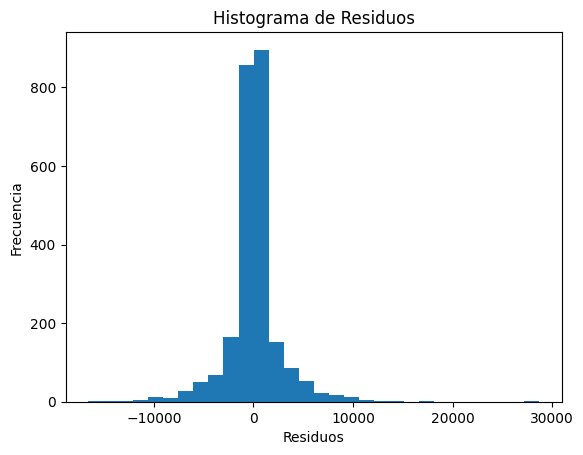

In [ ]:
residual = y_test - previsoes
plt.hist(residual, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

**Normalidad:** Además de la forma de campana, puedes utilizar pruebas estadísticas como la prueba de normalidad (por ejemplo, la prueba de Shapiro-Wilk o Anderson-Darling) para cuantificar si tus residuos siguen una distribución normal. Si la prueba de normalidad arroja un valor p pequeño (por debajo de un umbral predefinido), podría indicar que los residuos no siguen una distribución normal.

In [ ]:
from scipy import stats

residuos_transformados, _ = stats.yeojohnson(residual)

# Puedes imprimir los residuos transformados
print("Residuos transformados:", residuos_transformados)

Residuos transformados: [-3318.20507134  4380.13487777  1404.04713097 ...    -5.02957987
  3891.54077742   292.82284711]


In [ ]:
from scipy import stats

# Realiza la prueba de Shapiro-Wilk en los residuos transformados
stat, p = stats.shapiro(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p}")

# Comprueba la hipótesis nula y decide si los residuos transformados siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("Los residuos transformados parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de prueba: 0.8089442253112793
Valor p: 0.0
Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Realiza la prueba de normalidad de Anderson-Darling
result = stats.anderson(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de Anderson-Darling: {result.statistic}")
print(f"Valores críticos: {result.critical_values}")
print(f"Niveles de significancia: {result.significance_level}")

# Comprueba la hipótesis nula y decide si los residuos siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if result.statistic < result.critical_values[2]:
    print("Los residuos parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de Anderson-Darling: 164.18080441589063
Valores críticos: [0.575 0.655 0.786 0.917 1.09 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 7145042.110474632


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 1455.4369885433716


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9034442680468099


##### **2. Lineal Regression:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Regresion Lineal
lineal_reg = LinearRegression()
lineal_reg.fit(X_train, y_train)
previsoes = lineal_reg.predict(X_test)

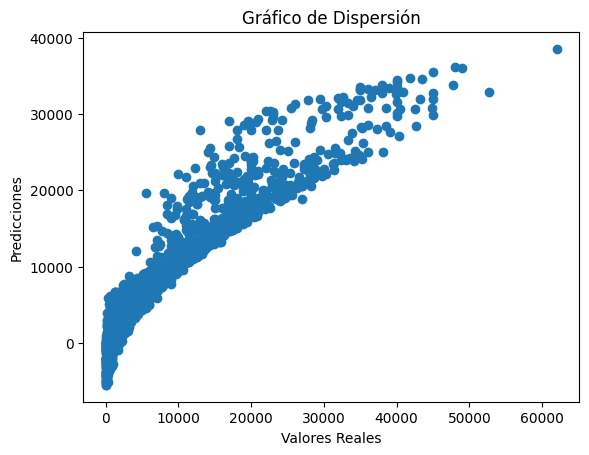

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 8211946.71775408


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 1832.211172383378


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.8890264726458456


##### **3. Random Forest Regressor:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Random Forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
previsoes = rf_regressor.predict(X_test)

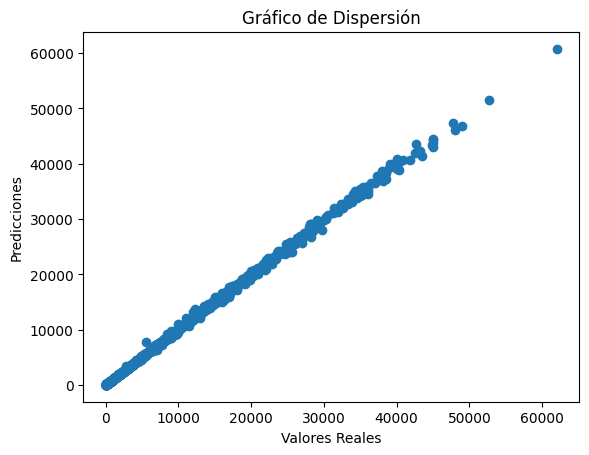

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 48208.38215699672


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 87.79748363338788


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9993485278948008


##### **4. Maquina de Soporte Vectorial (SVM):** Supervised Learning Model

In [ ]:
#Crea una instancia del modelo SVM para regresión
svr = SVR(kernel='linear')  # Puedes elegir diferentes tipos de kernel (lineal, polinomial, radial, etc.)

# Entrena el modelo en los datos de entrenamiento
svr.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = svr.predict(X_test)

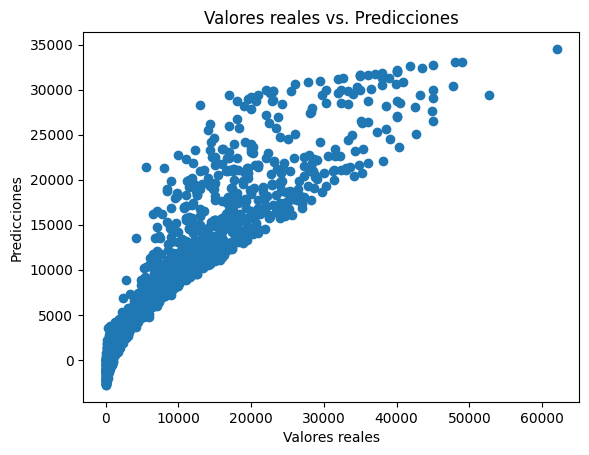

In [ ]:
# Grafica las predicciones vs. los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 9794864.74345849


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 1694.9455538611592


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.8676354428617489


## AVENA

### Filtro de cultivo **"Avena"** para separar del dataset original y obtener **df_agricola_avena**

In [ ]:
filtro = (df_agricola['produccion '] != 0) & (df_agricola['cultivo'] == 'Avena')
df_agricola_avena = df_agricola[filtro]
df_agricola_avena

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
12029,Buenos Aires,25 de Mayo,Avena,14000,3000,4200,1400
12030,Buenos Aires,25 de Mayo,Avena,12000,1500,1950,1300
12031,Buenos Aires,25 de Mayo,Avena,20000,3000,3600,1200
12032,Buenos Aires,25 de Mayo,Avena,22000,1960,2600,1327
12033,Buenos Aires,25 de Mayo,Avena,10000,3000,3600,1200
...,...,...,...,...,...,...,...
22466,Tucuman,Leales,Avena,300,240,264,1100
22467,Tucuman,Leales,Avena,200,120,108,900
22468,Tucuman,Leales,Avena,150,100,100,1000
22528,Tucuman,Trancas,Avena,620,520,1144,2200


In [ ]:
estadisticos_cont(df_agricola_avena.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
sup_sembrada,6848.0,9902.523949,4500.0,20395.616801,2.0,1500.0,4500.0,13000.0,880000.0
sup_cosechada,6848.0,2255.060018,700.0,5095.745512,2.0,200.0,700.0,2500.0,260000.0
produccion,6848.0,3562.239778,1020.0,8050.044909,1.0,300.0,1020.0,3750.0,350000.0
rendimiento,6848.0,1529.265041,1400.0,680.829436,167.0,1000.0,1400.0,2000.0,4100.0


### Limpieza de outliers para **df_agricola_avena**

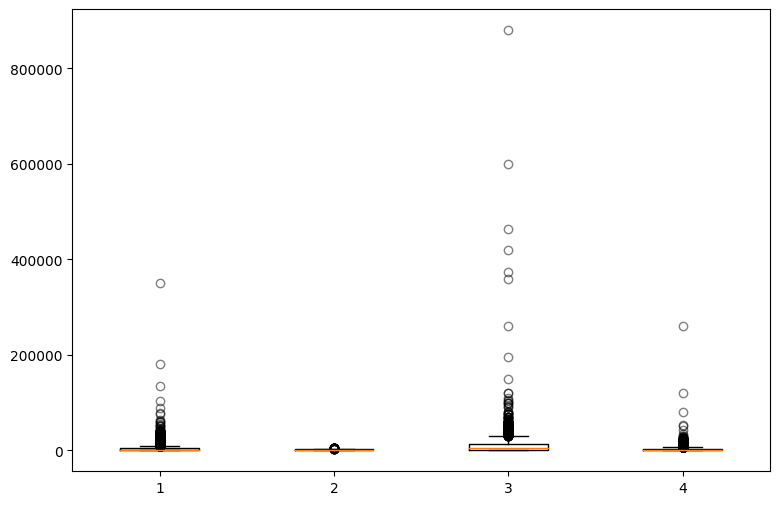

In [ ]:
datos_1 = df_agricola_avena['produccion ']
datos_2 = df_agricola_avena['rendimiento']
datos_3 = df_agricola_avena['sup_sembrada']
datos_4 = df_agricola_avena['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

* #### Eliminación de outliers de la columna **"produccion"**

In [ ]:
#Z-scores se utilizan comúnmente para identificar valores extremos o atípicos en un conjunto de datos
#Aplico la fórmula de Z score para la reducción de valores extremos
z_scores_produccion= (df_agricola_avena['produccion '] - df_agricola_avena['produccion '].mean()) / df_agricola_avena['produccion '].std()
z_scores_produccion

12029    0.079224
12030   -0.200277
12031    0.004691
12032   -0.119532
12033    0.004691
           ...   
22466   -0.409717
22467   -0.429096
22468   -0.430089
22528   -0.300401
22529   -0.334438
Name: produccion , Length: 6848, dtype: float64

* #### Eliminación de outliers de la columna **"rendimiento"**

In [ ]:
z_scores_rendimiento= (df_agricola_avena['rendimiento'] - df_agricola_avena['rendimiento'].mean()) / df_agricola_avena['rendimiento'].std()
z_scores_rendimiento

12029   -0.189864
12030   -0.336744
12031   -0.483623
12032   -0.297086
12033   -0.483623
           ...   
22466   -0.630503
22467   -0.924262
22468   -0.777383
22528    0.985173
22529    0.077457
Name: rendimiento, Length: 6848, dtype: float64

* #### Eliminación de outliers de la columna **"superficie sembrada"**

In [ ]:
z_scores_sembrada= (df_agricola_avena['sup_sembrada'] - df_agricola_avena['sup_sembrada'].mean()) / df_agricola_avena['sup_sembrada'].std()
z_scores_sembrada

12029    0.200900
12030    0.102840
12031    0.495081
12032    0.593141
12033    0.004779
           ...   
22466   -0.470813
22467   -0.475716
22468   -0.478168
22528   -0.455123
22529   -0.456104
Name: sup_sembrada, Length: 6848, dtype: float64

* #### Eliminación de outliers de la columna **"superficie cosechada"**

In [ ]:
z_scores_cosechada= (df_agricola_avena['sup_cosechada'] - df_agricola_avena['sup_cosechada'].mean()) / df_agricola_avena['sup_cosechada'].std()
z_scores_cosechada

12029    0.146189
12030   -0.148175
12031    0.146189
12032   -0.057903
12033    0.146189
           ...   
22466   -0.395440
22467   -0.418989
22468   -0.422914
22528   -0.340492
22529   -0.334605
Name: sup_cosechada, Length: 6848, dtype: float64

In [ ]:
umbral_z_score = 1.96  # El umbral que deseas utilizar

for columna in columnas_a_filtrar:
    z_scores = (df_agricola_avena[columna] - df_agricola_avena[columna].mean()) / df_agricola_avena[columna].std()
    df_agricola_avena = df_agricola_avena[np.abs(z_scores) < umbral_z_score]

In [ ]:
df_agricola_avena

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
12029,Buenos Aires,25 de Mayo,Avena,14000,3000,4200,1400
12030,Buenos Aires,25 de Mayo,Avena,12000,1500,1950,1300
12031,Buenos Aires,25 de Mayo,Avena,20000,3000,3600,1200
12032,Buenos Aires,25 de Mayo,Avena,22000,1960,2600,1327
12033,Buenos Aires,25 de Mayo,Avena,10000,3000,3600,1200
...,...,...,...,...,...,...,...
22466,Tucuman,Leales,Avena,300,240,264,1100
22467,Tucuman,Leales,Avena,200,120,108,900
22468,Tucuman,Leales,Avena,150,100,100,1000
22528,Tucuman,Trancas,Avena,620,520,1144,2200


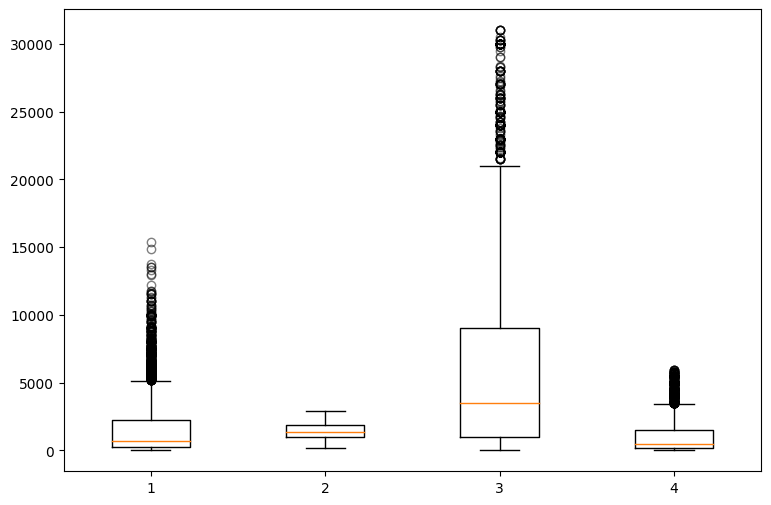

In [ ]:
datos_1 = df_agricola_avena['produccion ']
datos_2 = df_agricola_avena['rendimiento']
datos_3 = df_agricola_avena['sup_sembrada']
datos_4 = df_agricola_avena['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

### **B)** Machine Learning

La variable objetivo a predecir es **"produccion"**

*   Primero antes de continuar los pasos siguientes vamos a utilizar el LabelEncoder para transformar nuestras variables categóricas **(columnas: "provincia", "departamento" y "cultivo")** en variables numéricas



In [ ]:
#Realizo label encoder para las tres columnas: "provincia", "departamento", "cultivo"
label_encoder_provincia = LabelEncoder()
label_encoder_departamento = LabelEncoder()
label_encoder_cultivo = LabelEncoder()


df_agricola_avena['provincia'] = label_encoder_provincia.fit_transform(df_agricola_avena['provincia'])
df_agricola_avena['departamento'] = label_encoder_departamento.fit_transform(df_agricola_avena['departamento'])
df_agricola_avena['cultivo'] = label_encoder_cultivo.fit_transform(df_agricola_avena['cultivo'])

In [ ]:
#Muestro los resultados que apliqué label encoder a las columnas mencionadas anteriormente
df_agricola_avena

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
12029,0,0,0,14000,3000,4200,1400
12030,0,0,0,12000,1500,1950,1300
12031,0,0,0,20000,3000,3600,1200
12032,0,0,0,22000,1960,2600,1327
12033,0,0,0,10000,3000,3600,1200
...,...,...,...,...,...,...,...
22466,15,131,0,300,240,264,1100
22467,15,131,0,200,120,108,900
22468,15,131,0,150,100,100,1000
22528,15,232,0,620,520,1144,2200


#### B-1) Separación en variables carasterísticas (features variable) y variable objetivo (target variable)

In [ ]:
X = df_agricola_avena.drop('produccion ', axis = 1) #Variables carasteristicas o features
X = X.values
y = df_agricola_avena['produccion '] #Variable objetivo o target

#### B-2) **MODELOS**



*   **Transformación de datos en Train e Test, aquí utilizaremos el 30% de nuestros datos para probar los modelos de aprendizaje automático.**



In [ ]:
#Crearemos las variables predictoras y objetivo para conjuntos de datos de test y training
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

***Para probar diferentes modelos, usamos todas las variables carasterísticas (no aplico feature selection)***

##### **1. Naive Bayes:** Supervised Learning Model

Ejecutando el Modelo Gaussiano: aquí usaremos el Modelo Naive Bayes, probaremos el modelo Gaussiano, usando nuestros Datos Normales

In [ ]:
#Entrenamiento y Predicción con un Modelo de Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

**Gráfico de Dispersión de Valores Reales vs. Predicciones:**

Crear un gráfico de dispersión para comparar los valores reales con las predicciones del modelo. Esto nos dará una idea visual de qué tan bien se ajustan las predicciones a los valores reales.

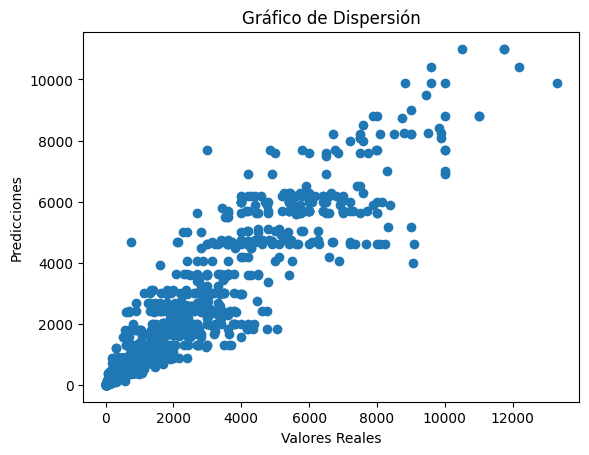

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

**Histograma de Residuos:**

Crear un histograma de los residuos, que son la diferencia entre los valores reales y las predicciones. Esto nos dará una idea de la distribución de los errores del modelo

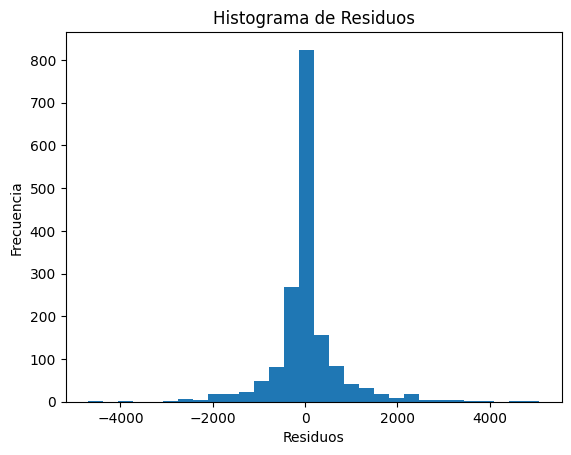

In [ ]:
residual = y_test - previsoes
plt.hist(residual, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

**Normalidad:** Además de la forma de campana, puedes utilizar pruebas estadísticas como la prueba de normalidad (por ejemplo, la prueba de Shapiro-Wilk o Anderson-Darling) para cuantificar si tus residuos siguen una distribución normal. Si la prueba de normalidad arroja un valor p pequeño (por debajo de un umbral predefinido), podría indicar que los residuos no siguen una distribución normal.

In [ ]:
from scipy import stats

residuos_transformados, _ = stats.yeojohnson(residual)

# Puedes imprimir los residuos transformados
print("Residuos transformados:", residuos_transformados)

Residuos transformados: [ -5.10260071  19.24176186 185.32588479 ... 203.52520085 643.6191191
 688.12603749]


In [ ]:
from scipy import stats

# Realiza la prueba de Shapiro-Wilk en los residuos transformados
stat, p = stats.shapiro(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p}")

# Comprueba la hipótesis nula y decide si los residuos transformados siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("Los residuos transformados parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de prueba: 0.8220182657241821
Valor p: 1.3948076498380645e-39
Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Realiza la prueba de normalidad de Anderson-Darling
result = stats.anderson(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de Anderson-Darling: {result.statistic}")
print(f"Valores críticos: {result.critical_values}")
print(f"Niveles de significancia: {result.significance_level}")

# Comprueba la hipótesis nula y decide si los residuos siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if result.statistic < result.critical_values[2]:
    print("Los residuos parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de Anderson-Darling: 106.75624990955748
Valores críticos: [0.575 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 538220.2822966507


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 404.011961722488


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.8847375625271642


##### **2. Lineal Regression:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Regresion Lineal
lineal_reg = LinearRegression()
lineal_reg.fit(X_train, y_train)
previsoes = lineal_reg.predict(X_test)

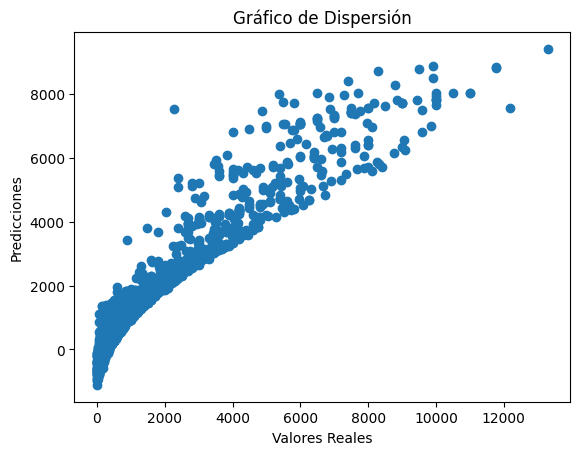

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 444788.65901007305


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 434.2455970889454


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.904746389751403


##### **3. Random Forest Regressor:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Random Forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
previsoes = rf_regressor.predict(X_test)

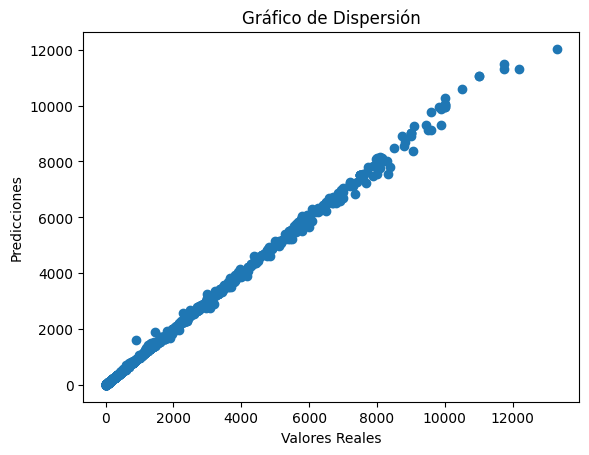

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 6200.033645574162


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 26.14410287081339


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.998672233258559


##### **4. Maquina de Soporte Vectorial (SVM):** Supervised Learning Model

In [ ]:
#Crea una instancia del modelo SVM para regresión
svr = SVR(kernel='linear')  # Puedes elegir diferentes tipos de kernel (lineal, polinomial, radial, etc.)

# Entrena el modelo en los datos de entrenamiento
svr.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = svr.predict(X_test)

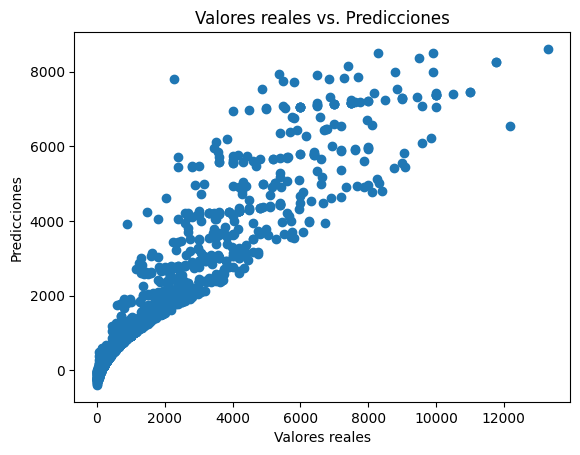

In [ ]:
# Grafica las predicciones vs. los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 549992.0562432803


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 383.51686759368306


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.8822165810571275


## SOJA

### Filtro de cultivo **"Soja"** para separar del dataset original y obtener **df_agricola_soja**

In [ ]:
filtro = (df_agricola['produccion '] != 0) & (df_agricola['cultivo'] == 'Soja total')
df_agricola_soja = df_agricola[filtro]
df_agricola_soja

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
107265,Buenos Aires,25 de Mayo,Soja total,600,400,600,1500
107266,Buenos Aires,25 de Mayo,Soja total,500,500,750,1500
107267,Buenos Aires,25 de Mayo,Soja total,250,200,320,1600
107268,Buenos Aires,25 de Mayo,Soja total,1000,1000,1400,1400
107269,Buenos Aires,25 de Mayo,Soja total,1500,1500,2400,1600
...,...,...,...,...,...,...,...
117543,Tucuman,Yerba Buena,Soja total,100,100,290,2900
117544,Tucuman,Yerba Buena,Soja total,110,110,363,3300
117545,Tucuman,Yerba Buena,Soja total,40,40,116,2900
117546,Tucuman,Yerba Buena,Soja total,50,50,140,2800


In [ ]:
estadisticos_cont(df_agricola_soja.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
sup_sembrada,10158.0,41745.367887,8000.0,81877.038903,1.0,1000.0,8000.0,45775.00,1096100.0
sup_cosechada,10158.0,40526.348297,7300.0,80256.212881,1.0,900.0,7300.0,43500.00,1066100.0
produccion,10158.0,104379.858929,13691.0,233202.078576,1.0,1400.0,13691.0,96927.75,2637503.0
rendimiento,10158.0,2040.735479,2000.0,749.689486,120.0,1500.0,2000.0,2500.00,20000.0


### Limpieza de outliers para **df_agricola_soja**

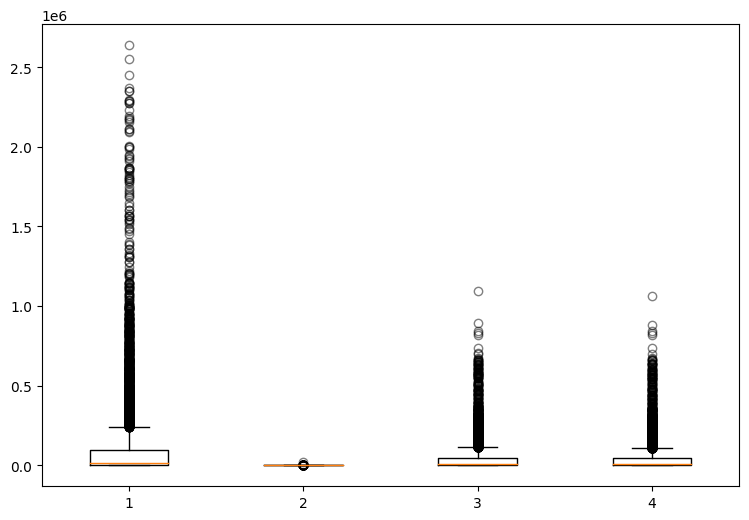

In [ ]:
datos_1 = df_agricola_soja['produccion ']
datos_2 = df_agricola_soja['rendimiento']
datos_3 = df_agricola_soja['sup_sembrada']
datos_4 = df_agricola_soja['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

* #### Eliminación de outliers de la columna **"produccion"**

In [ ]:
#Z-scores se utilizan comúnmente para identificar valores extremos o atípicos en un conjunto de datos
#Aplico la fórmula de Z score para la reducción de valores extremos
z_scores_produccion= (df_agricola_soja['produccion '] - df_agricola_soja['produccion '].mean()) / df_agricola_soja['produccion '].std()
z_scores_produccion

107265   -0.445021
107266   -0.444378
107267   -0.446222
107268   -0.441591
107269   -0.437303
            ...   
117543   -0.446350
117544   -0.446037
117545   -0.447097
117546   -0.446994
117547   -0.446844
Name: produccion , Length: 10158, dtype: float64

* #### Eliminación de outliers de la columna **"rendimiento"**

In [ ]:
z_scores_rendimiento= (df_agricola_soja['rendimiento'] - df_agricola_soja['rendimiento'].mean()) / df_agricola_soja['rendimiento'].std()
z_scores_rendimiento

107265   -0.721279
107266   -0.721279
107267   -0.587891
107268   -0.854668
107269   -0.587891
            ...   
117543    1.146161
117544    1.679715
117545    1.146161
117546    1.012772
117547    0.612606
Name: rendimiento, Length: 10158, dtype: float64

* #### Eliminación de outliers de la columna **"superficie sembrada"**

In [ ]:
z_scores_sembrada= (df_agricola_soja['sup_sembrada'] - df_agricola_soja['sup_sembrada'].mean()) / df_agricola_soja['sup_sembrada'].std()
z_scores_sembrada

107265   -0.502526
107266   -0.503748
107267   -0.506801
107268   -0.497641
107269   -0.491534
            ...   
117543   -0.508633
117544   -0.508511
117545   -0.509366
117546   -0.509244
117547   -0.508999
Name: sup_sembrada, Length: 10158, dtype: float64

* #### Eliminación de outliers de la columna **"superficie cosechada"**

In [ ]:
z_scores_cosechada= (df_agricola_soja['sup_cosechada'] - df_agricola_soja['sup_cosechada'].mean()) / df_agricola_soja['sup_cosechada'].std()
z_scores_cosechada

107265   -0.499978
107266   -0.498732
107267   -0.502470
107268   -0.492502
107269   -0.486272
            ...   
117543   -0.503716
117544   -0.503592
117545   -0.504464
117546   -0.504339
117547   -0.504090
Name: sup_cosechada, Length: 10158, dtype: float64

In [ ]:
umbral_z_score = 1.96  # El umbral que deseas utilizar

for columna in columnas_a_filtrar:
    z_scores = (df_agricola_soja[columna] - df_agricola_soja[columna].mean()) / df_agricola_soja[columna].std()
    df_agricola_soja = df_agricola_soja[np.abs(z_scores) < umbral_z_score]

In [ ]:
df_agricola_soja

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
107265,Buenos Aires,25 de Mayo,Soja total,600,400,600,1500
107266,Buenos Aires,25 de Mayo,Soja total,500,500,750,1500
107267,Buenos Aires,25 de Mayo,Soja total,250,200,320,1600
107268,Buenos Aires,25 de Mayo,Soja total,1000,1000,1400,1400
107269,Buenos Aires,25 de Mayo,Soja total,1500,1500,2400,1600
...,...,...,...,...,...,...,...
117542,Tucuman,Yerba Buena,Soja total,160,160,416,2600
117543,Tucuman,Yerba Buena,Soja total,100,100,290,2900
117545,Tucuman,Yerba Buena,Soja total,40,40,116,2900
117546,Tucuman,Yerba Buena,Soja total,50,50,140,2800


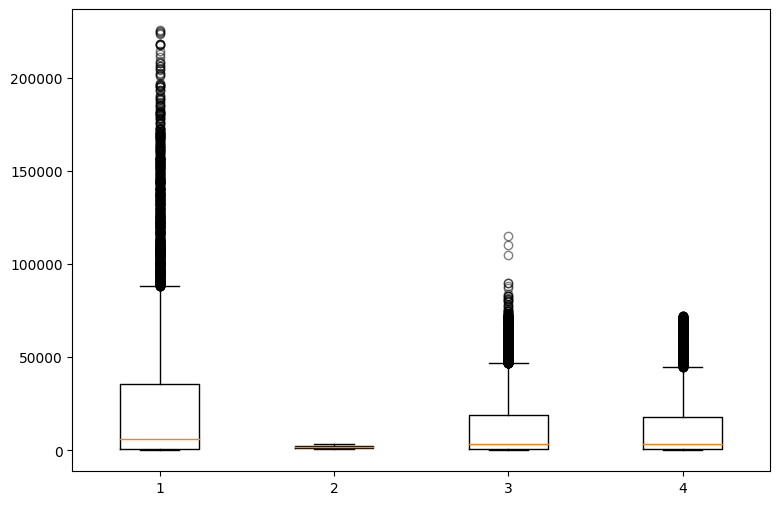

In [ ]:
datos_1 = df_agricola_soja['produccion ']
datos_2 = df_agricola_soja['rendimiento']
datos_3 = df_agricola_soja['sup_sembrada']
datos_4 = df_agricola_soja['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

### **B)** Machine Learning

La variable objetivo a predecir es **"produccion"**

*   Primero antes de continuar los pasos siguientes vamos a utilizar el LabelEncoder para transformar nuestras variables categóricas **(columnas: "provincia", "departamento" y "cultivo")** en variables numéricas



In [ ]:
#Realizo label encoder para las tres columnas: "provincia", "departamento", "cultivo"
label_encoder_provincia = LabelEncoder()
label_encoder_departamento = LabelEncoder()
label_encoder_cultivo = LabelEncoder()


df_agricola_soja['provincia'] = label_encoder_provincia.fit_transform(df_agricola_soja['provincia'])
df_agricola_soja['departamento'] = label_encoder_departamento.fit_transform(df_agricola_soja['departamento'])
df_agricola_soja['cultivo'] = label_encoder_cultivo.fit_transform(df_agricola_soja['cultivo'])

In [ ]:
#Muestro los resultados que apliqué label encoder a las columnas mencionadas anteriormente
df_agricola_soja

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
107265,0,3,0,600,400,600,1500
107266,0,3,0,500,500,750,1500
107267,0,3,0,250,200,320,1600
107268,0,3,0,1000,1000,1400,1400
107269,0,3,0,1500,1500,2400,1600
...,...,...,...,...,...,...,...
117542,14,284,0,160,160,416,2600
117543,14,284,0,100,100,290,2900
117545,14,284,0,40,40,116,2900
117546,14,284,0,50,50,140,2800


#### B-1) Separación en variables carasterísticas (features variable) y variable objetivo (target variable)

In [ ]:
X = df_agricola_soja.drop('produccion ', axis = 1) #Variables carasteristicas o features
X = X.values
y = df_agricola_soja['produccion '] #Variable objetivo o target

#### B-2) **MODELOS**



*   **Transformación de datos en Train e Test, aquí utilizaremos el 30% de nuestros datos para probar los modelos de aprendizaje automático.**



In [ ]:
#Crearemos las variables predictoras y objetivo para conjuntos de datos de test y training
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

***Para probar diferentes modelos, usamos todas las variables carasterísticas (no aplico feature selection)***

##### **1. Naive Bayes:** Supervised Learning Model

Ejecutando el Modelo Gaussiano: aquí usaremos el Modelo Naive Bayes, probaremos el modelo Gaussiano, usando nuestros Datos Normales

In [ ]:
#Entrenamiento y Predicción con un Modelo de Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

**Gráfico de Dispersión de Valores Reales vs. Predicciones:**

Crear un gráfico de dispersión para comparar los valores reales con las predicciones del modelo. Esto nos dará una idea visual de qué tan bien se ajustan las predicciones a los valores reales.

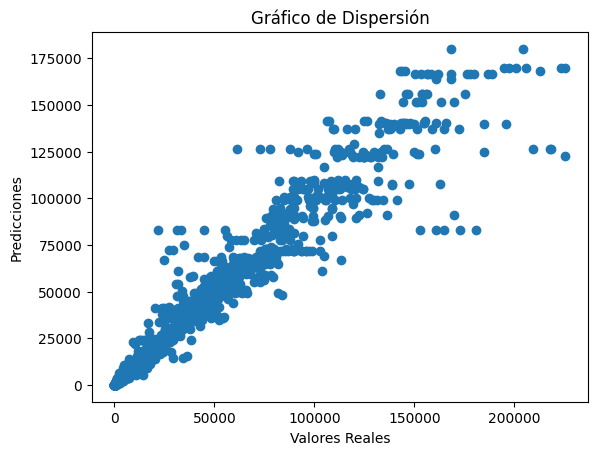

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

**Histograma de Residuos:**

Crear un histograma de los residuos, que son la diferencia entre los valores reales y las predicciones. Esto nos dará una idea de la distribución de los errores del modelo

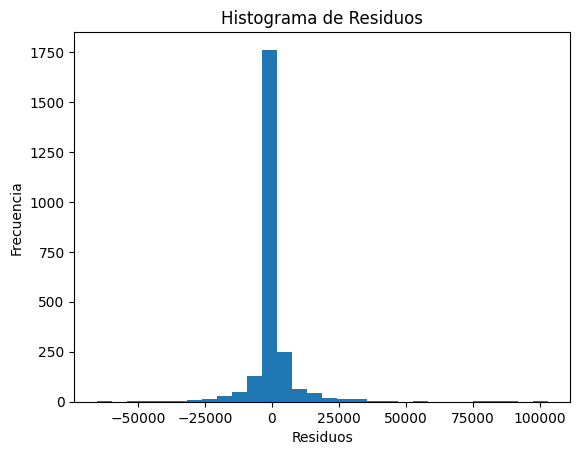

In [ ]:
residual = y_test - previsoes
plt.hist(residual, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

**Normalidad:** Además de la forma de campana, puedes utilizar pruebas estadísticas como la prueba de normalidad (por ejemplo, la prueba de Shapiro-Wilk o Anderson-Darling) para cuantificar si tus residuos siguen una distribución normal. Si la prueba de normalidad arroja un valor p pequeño (por debajo de un umbral predefinido), podría indicar que los residuos no siguen una distribución normal.

In [ ]:
from scipy import stats

residuos_transformados, _ = stats.yeojohnson(residual)

# Puedes imprimir los residuos transformados
print("Residuos transformados:", residuos_transformados)

Residuos transformados: [    53.62974636 -12337.86236923     93.12182475 ... -15425.78255719
  -1122.5047041    -195.50202659]


In [ ]:
from scipy import stats

# Realiza la prueba de Shapiro-Wilk en los residuos transformados
stat, p = stats.shapiro(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p}")

# Comprueba la hipótesis nula y decide si los residuos transformados siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("Los residuos transformados parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de prueba: 0.5765622854232788
Valor p: 0.0
Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Realiza la prueba de normalidad de Anderson-Darling
result = stats.anderson(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de Anderson-Darling: {result.statistic}")
print(f"Valores críticos: {result.critical_values}")
print(f"Niveles de significancia: {result.significance_level}")

# Comprueba la hipótesis nula y decide si los residuos siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if result.statistic < result.critical_values[2]:
    print("Los residuos parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de Anderson-Darling: 350.1623466547444
Valores críticos: [0.575 0.655 0.786 0.916 1.09 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)


In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 94271718.28230453


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 3740.5744855967077


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.944753320380093


##### **2. Lineal Regression:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Regresion Lineal
lineal_reg = LinearRegression()
lineal_reg.fit(X_train, y_train)
previsoes = lineal_reg.predict(X_test)

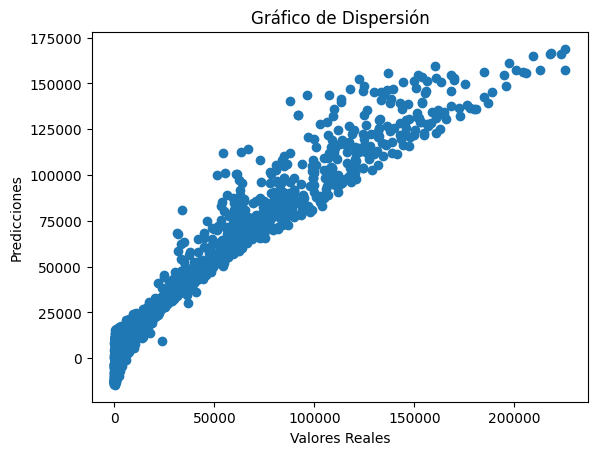

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 99881910.99933329


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 6642.802160117815


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9414655419743205


##### **3. Random Forest Regressor:** Supervised Learning Model

In [ ]:
#Entrenamiento y Predicción con un Modelo de Random Forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
previsoes = rf_regressor.predict(X_test)

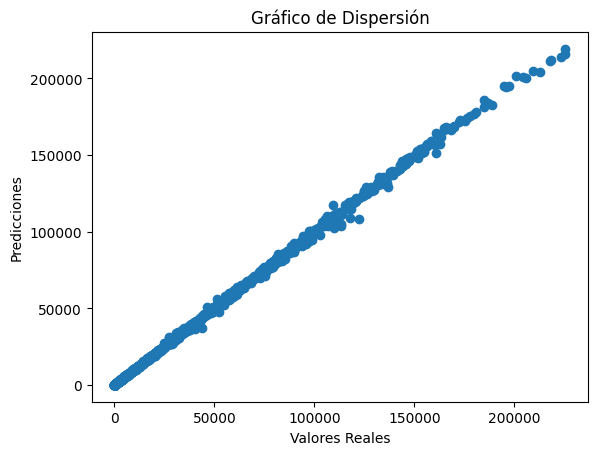

In [ ]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 996104.3907625515


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 368.80716872427985


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9994162463446392


##### **4. Maquina de Soporte Vectorial (SVM):** Supervised Learning Model

In [ ]:
#Crea una instancia del modelo SVM para regresión
svr = SVR(kernel='linear')  # Puedes elegir diferentes tipos de kernel (lineal, polinomial, radial, etc.)

# Entrena el modelo en los datos de entrenamiento
svr.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = svr.predict(X_test)

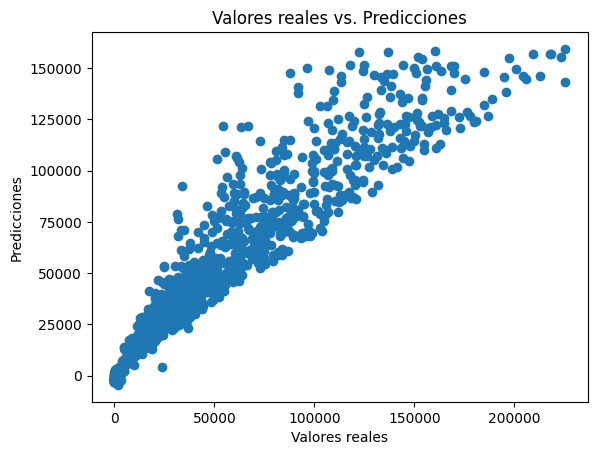

In [ ]:
# Grafica las predicciones vs. los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()

In [ ]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 128720274.71208325


In [ ]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 5428.495567967557


In [ ]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9245652046321113


## GIRASOL

### Filtro de cultivo **"Girasol"** para separar del dataset original y obtener **df_agricola_girasol**

In [7]:
filtro = (df_agricola['produccion '] != 0) & (df_agricola['cultivo'] == 'Girasol')
df_agricola_girasol = df_agricola[filtro]
df_agricola_girasol

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
47497,Buenos Aires,25 de Mayo,Girasol,30000,30000,22500,750
47498,Buenos Aires,25 de Mayo,Girasol,44000,31000,15000,484
47499,Buenos Aires,25 de Mayo,Girasol,22000,19000,10450,550
47500,Buenos Aires,25 de Mayo,Girasol,20000,5000,5100,1020
47501,Buenos Aires,25 de Mayo,Girasol,14000,14000,10800,771
...,...,...,...,...,...,...,...
57137,Tucuman,Monteros,Girasol,200,200,200,1000
57138,Tucuman,Rio Chico,Girasol,150,150,150,1000
57139,Tucuman,Rio Chico,Girasol,370,370,407,1100
57140,Tucuman,Rio Chico,Girasol,100,100,100,1000


In [8]:
estadisticos_cont(df_agricola_girasol.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
sup_sembrada,9616.0,11163.438124,4000.0,18039.638125,5.0,1000.00,4000.0,14000.0,218000.0
sup_cosechada,9616.0,10618.503640,3750.0,17471.499228,4.0,950.00,3750.0,13000.0,216500.0
produccion,9616.0,16292.579347,4600.0,30136.919142,1.0,1213.75,4600.0,17000.0,411400.0
rendimiento,9616.0,1445.913270,1400.0,626.941930,250.0,900.00,1400.0,1900.0,4137.0


### Limpieza de outliers para **df_agricola_girasol**

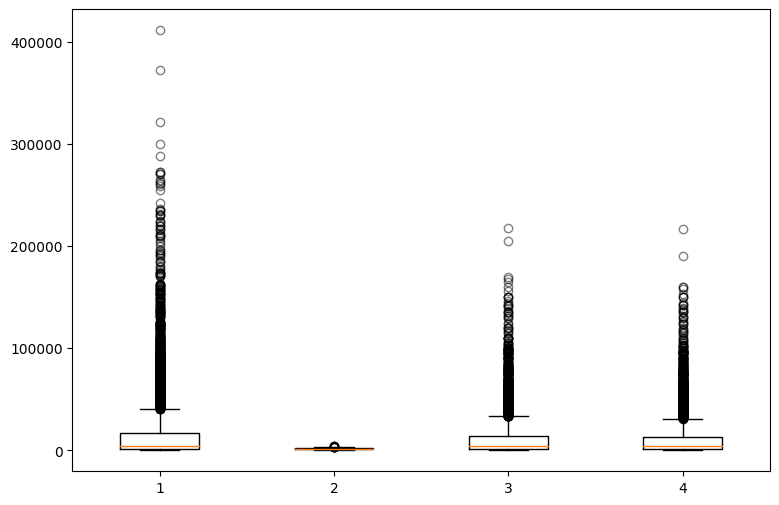

In [9]:
datos_1 = df_agricola_girasol['produccion ']
datos_2 = df_agricola_girasol['rendimiento']
datos_3 = df_agricola_girasol['sup_sembrada']
datos_4 = df_agricola_girasol['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

* #### Eliminación de outliers de la columna **"produccion"**

In [10]:
#Z-scores se utilizan comúnmente para identificar valores extremos o atípicos en un conjunto de datos
#Aplico la fórmula de Z score para la reducción de valores extremos
z_scores_produccion= (df_agricola_girasol['produccion '] - df_agricola_girasol['produccion '].mean()) / df_agricola_girasol['produccion '].std()
z_scores_produccion

47497    0.205974
47498   -0.042890
47499   -0.193868
47500   -0.371391
47501   -0.182254
           ...   
57137   -0.533982
57138   -0.535641
57139   -0.527114
57140   -0.537300
57141   -0.539490
Name: produccion , Length: 9616, dtype: float64

* #### Eliminación de outliers de la columna **"rendimiento"**

In [11]:
z_scores_rendimiento= (df_agricola_girasol['rendimiento'] - df_agricola_girasol['rendimiento'].mean()) / df_agricola_girasol['rendimiento'].std()
z_scores_rendimiento

47497   -1.110012
47498   -1.534294
47499   -1.429021
47500   -0.679350
47501   -1.076516
           ...   
57137   -0.711251
57138   -0.711251
57139   -0.551747
57140   -0.711251
57141   -0.950508
Name: rendimiento, Length: 9616, dtype: float64

* #### Eliminación de outliers de la columna **"superficie sembrada"**

In [12]:
z_scores_sembrada= (df_agricola_girasol['sup_sembrada'] - df_agricola_girasol['sup_sembrada'].mean()) / df_agricola_girasol['sup_sembrada'].std()
z_scores_sembrada

47497    1.044176
47498    1.820245
47499    0.600708
47500    0.489841
47501    0.157241
           ...   
57137   -0.607742
57138   -0.610513
57139   -0.598318
57140   -0.613285
57141   -0.616611
Name: sup_sembrada, Length: 9616, dtype: float64

* #### Eliminación de outliers de la columna **"superficie cosechada"**

In [13]:
z_scores_cosechada= (df_agricola_girasol['sup_cosechada'] - df_agricola_girasol['sup_cosechada'].mean()) / df_agricola_girasol['sup_cosechada'].std()
z_scores_cosechada

47497    1.109321
47498    1.166557
47499    0.479724
47500   -0.321581
47501    0.193544
           ...   
57137   -0.596314
57138   -0.599176
57139   -0.586584
57140   -0.602038
57141   -0.605472
Name: sup_cosechada, Length: 9616, dtype: float64

In [16]:
umbral_z_score = 1.96  # El umbral que deseas utilizar

for columna in columnas_a_filtrar:
    z_scores = (df_agricola_girasol[columna] - df_agricola_girasol[columna].mean()) / df_agricola_girasol[columna].std()
    df_agricola_girasol = df_agricola_girasol[np.abs(z_scores) < umbral_z_score]

#### Post limpieza de outliers

In [17]:
df_agricola_girasol

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
47500,Buenos Aires,25 de Mayo,Girasol,20000,5000,5100,1020
47501,Buenos Aires,25 de Mayo,Girasol,14000,14000,10800,771
47502,Buenos Aires,25 de Mayo,Girasol,8000,2400,2160,900
47503,Buenos Aires,25 de Mayo,Girasol,10000,9000,10800,1200
47504,Buenos Aires,25 de Mayo,Girasol,10000,6000,3600,600
...,...,...,...,...,...,...,...
57137,Tucuman,Monteros,Girasol,200,200,200,1000
57138,Tucuman,Rio Chico,Girasol,150,150,150,1000
57139,Tucuman,Rio Chico,Girasol,370,370,407,1100
57140,Tucuman,Rio Chico,Girasol,100,100,100,1000


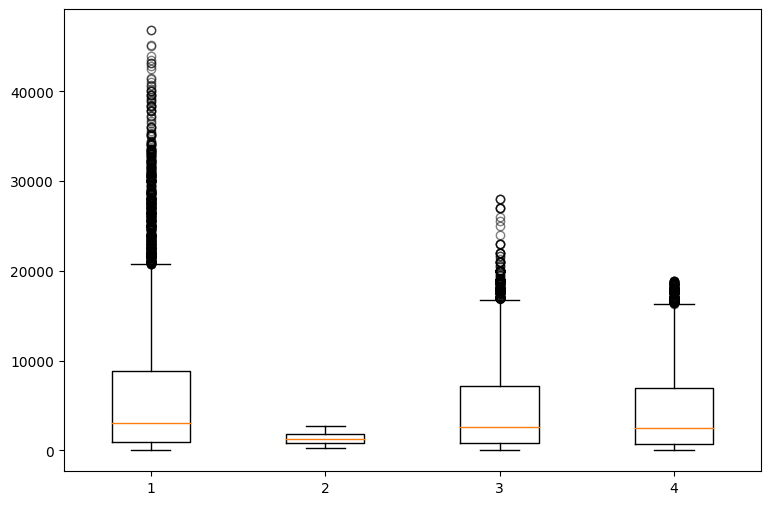

In [18]:
datos_1 = df_agricola_girasol['produccion ']
datos_2 = df_agricola_girasol['rendimiento']
datos_3 = df_agricola_girasol['sup_sembrada']
datos_4 = df_agricola_girasol['sup_cosechada']


data = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(data)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

### **B)** Machine Learning

La variable objetivo a predecir es **"produccion"**

*   Primero antes de continuar los pasos siguientes vamos a utilizar el LabelEncoder para transformar nuestras variables categóricas **(columnas: "provincia", "departamento" y "cultivo")** en variables numéricas



In [19]:
#Realizo label encoder para las tres columnas: "provincia", "departamento", "cultivo"
label_encoder_provincia = LabelEncoder()
label_encoder_departamento = LabelEncoder()
label_encoder_cultivo = LabelEncoder()


df_agricola_girasol['provincia'] = label_encoder_provincia.fit_transform(df_agricola_girasol['provincia'])
df_agricola_girasol['departamento'] = label_encoder_departamento.fit_transform(df_agricola_girasol['departamento'])
df_agricola_girasol['cultivo'] = label_encoder_cultivo.fit_transform(df_agricola_girasol['cultivo'])

In [20]:
#Muestro los resultados que apliqué label encoder a las columnas mencionadas anteriormente
df_agricola_girasol

,provincia,departamento,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
47500,0,3,0,20000,5000,5100,1020
47501,0,3,0,14000,14000,10800,771
47502,0,3,0,8000,2400,2160,900
47503,0,3,0,10000,9000,10800,1200
47504,0,3,0,10000,6000,3600,600
...,...,...,...,...,...,...,...
57137,14,157,0,200,200,200,1000
57138,14,189,0,150,150,150,1000
57139,14,189,0,370,370,407,1100
57140,14,189,0,100,100,100,1000


#### B-1) Separación en variables carasterísticas (features variable) y variable objetivo (target variable)

In [21]:
X = df_agricola_girasol.drop('produccion ', axis = 1) #Variables carasteristicas o features
X = X.values
y = df_agricola_girasol['produccion '] #Variable objetivo o target

#### B-2) **MODELOS**



*   **Transformación de datos en Train e Test, aquí utilizaremos el 30% de nuestros datos para probar los modelos de aprendizaje automático.**



In [22]:
#Crearemos las variables predictoras y objetivo para conjuntos de datos de test y training
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

***Para probar diferentes modelos, usamos todas las variables carasterísticas (no aplico feature selection)***

##### **1. Naive Bayes:** Supervised Learning Model

Ejecutando el Modelo Gaussiano: aquí usaremos el Modelo Naive Bayes, probaremos el modelo Gaussiano, usando nuestros Datos Normales

In [23]:
#Entrenamiento y Predicción con un Modelo de Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

**Gráfico de Dispersión de Valores Reales vs. Predicciones:**

Crear un gráfico de dispersión para comparar los valores reales con las predicciones del modelo. Esto nos dará una idea visual de qué tan bien se ajustan las predicciones a los valores reales.

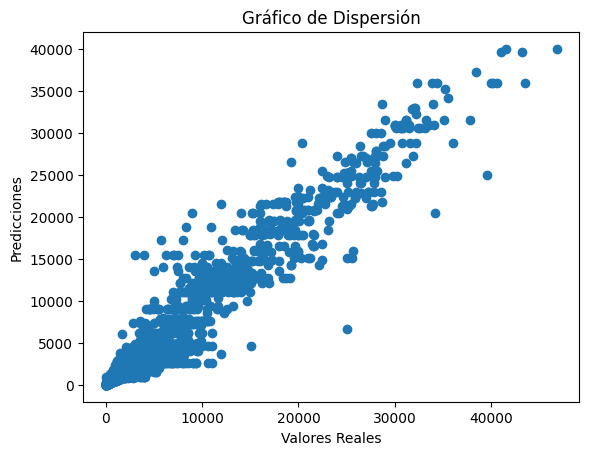

In [24]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

**Histograma de Residuos:**

Crear un histograma de los residuos, que son la diferencia entre los valores reales y las predicciones. Esto nos dará una idea de la distribución de los errores del modelo

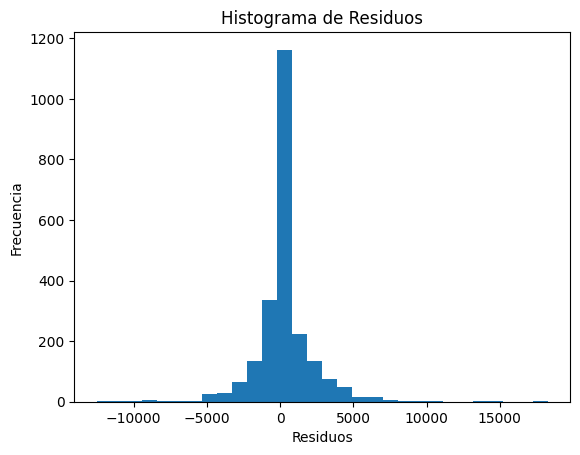

In [25]:
residual = y_test - previsoes
plt.hist(residual, bins=30)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

**Normalidad:** Además de la forma de campana, puedes utilizar pruebas estadísticas como la prueba de normalidad (por ejemplo, la prueba de Shapiro-Wilk o Anderson-Darling) para cuantificar si tus residuos siguen una distribución normal. Si la prueba de normalidad arroja un valor p pequeño (por debajo de un umbral predefinido), podría indicar que los residuos no siguen una distribución normal.

In [26]:
from scipy import stats

residuos_transformados, _ = stats.yeojohnson(residual)

# Puedes imprimir los residuos transformados
print("Residuos transformados:", residuos_transformados)

Residuos transformados: [  19.91898331  188.50331053 1778.50799962 ...   60.64096211 2953.50981925
 -130.94365657]


In [27]:
from scipy import stats

# Realiza la prueba de Shapiro-Wilk en los residuos transformados
stat, p = stats.shapiro(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p}")

# Comprueba la hipótesis nula y decide si los residuos transformados siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("Los residuos transformados parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de prueba: 0.8303114175796509
Valor p: 3.923635700109488e-44
Los residuos transformados no siguen una distribución normal (se rechaza la hipótesis nula)


In [28]:
# Realiza la prueba de normalidad de Anderson-Darling
result = stats.anderson(residuos_transformados)

# Imprime los resultados
print(f"Estadístico de Anderson-Darling: {result.statistic}")
print(f"Valores críticos: {result.critical_values}")
print(f"Niveles de significancia: {result.significance_level}")

# Comprueba la hipótesis nula y decide si los residuos siguen una distribución normal
alpha = 0.05  # Nivel de significancia
if result.statistic < result.critical_values[2]:
    print("Los residuos parecen seguir una distribución normal (no se rechaza la hipótesis nula)")
else:
    print("Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)")


Estadístico de Anderson-Darling: 123.59059940761199
Valores críticos: [0.575 0.655 0.786 0.916 1.09 ]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los residuos no siguen una distribución normal (se rechaza la hipótesis nula)


In [29]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 4068023.598346388


In [30]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 1145.9769364664926


In [31]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9345550132514358


##### **2. Lineal Regression:** Supervised Learning Model

In [32]:
#Entrenamiento y Predicción con un Modelo de Regresion Lineal
lineal_reg = LinearRegression()
lineal_reg.fit(X_train, y_train)
previsoes = lineal_reg.predict(X_test)

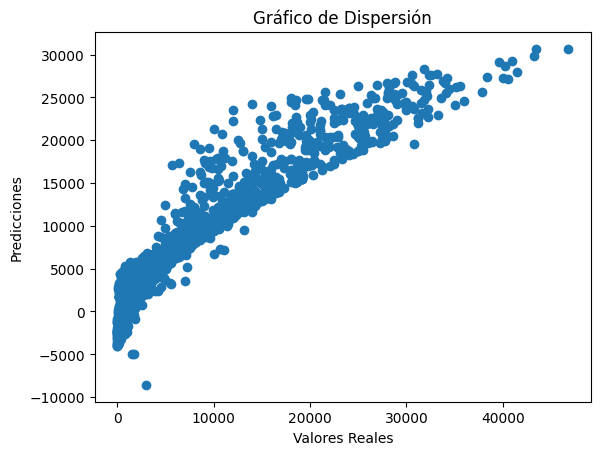

In [34]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [35]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 7002562.174120183


In [36]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 1828.2050331716537


In [37]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.8873451498959888


##### **3. Random Forest Regressor:** Supervised Learning Model

In [38]:
#Entrenamiento y Predicción con un Modelo de Random Forest
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
previsoes = rf_regressor.predict(X_test)

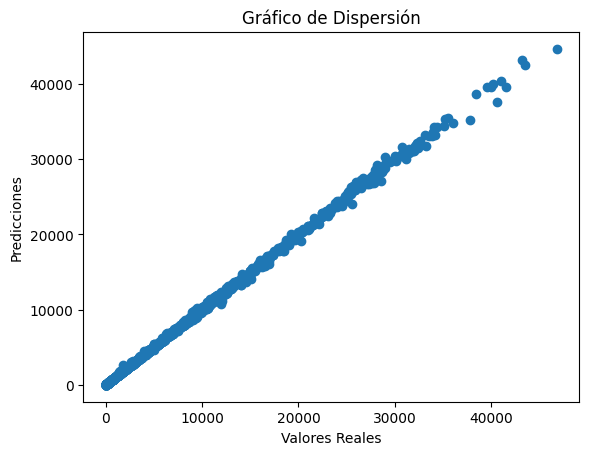

In [39]:
plt.scatter(y_test, previsoes)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Dispersión")
plt.show()

In [40]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, previsoes)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 42719.68397689293


In [41]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, previsoes)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 85.21802872062662


In [42]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, previsoes)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9993127401834869


##### **4. Maquina de Soporte Vectorial (SVM):** Supervised Learning Model

In [43]:
#Crea una instancia del modelo SVM para regresión
svr = SVR(kernel='linear')  # Puedes elegir diferentes tipos de kernel (lineal, polinomial, radial, etc.)

# Entrena el modelo en los datos de entrenamiento
svr.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred = svr.predict(X_test)

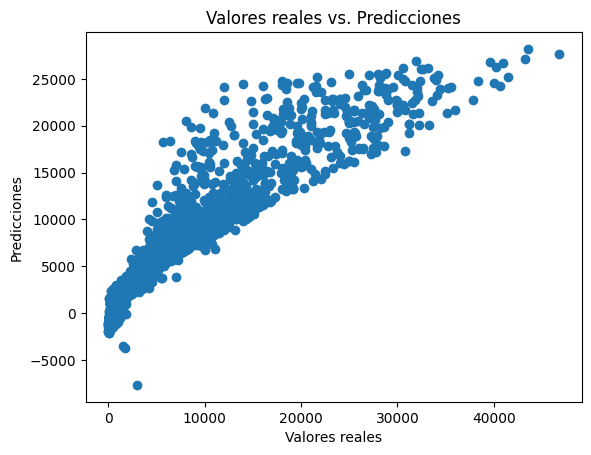

In [44]:
# Grafica las predicciones vs. los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs. Predicciones')
plt.show()

In [45]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 8189600.466707909


In [46]:
# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 1641.0413595800007


In [47]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.8682484796210129


# **CONCLUSION:**

In [51]:
data = {
    'Cultivo': ['Maiz', 'Trigo', 'Sorgo', 'Avena', 'Soja','Girasol'],
    'Naive Bayes': [
        {'MSE':43502499.54 , 'MAE':3155.36 , 'R2': 0.917},
        {'MSE':54538936.18, 'MAE': 3351.59, 'R2': 0.927},
        {'MSE': 7145042.11, 'MAE': 1455.43, 'R2': 0.903},
        {'MSE': 538220.28, 'MAE': 404.01, 'R2': 0.885},
        {'MSE': 94271718.28, 'MAE': 3740.57, 'R2': 0.944},
        {'MSE': 4068023.59, 'MAE': 1145.97, 'R2': 0.934}
    ],
    'Lineal Regression': [
        {'MSE':72326097.72 , 'MAE':5659.21 , 'R2': 0.862},
        {'MSE': 76943919.67, 'MAE':5751.17, 'R2': 0.897},
        {'MSE': 8211946.71, 'MAE': 1832.21, 'R2': 0.889},
        {'MSE': 444788.65, 'MAE': 434.24, 'R2': 0.904},
        {'MSE': 99881910.99, 'MAE': 6642.80, 'R2': 0.941},
        {'MSE': 7002562.17, 'MAE': 1828.20, 'R2': 0.887}
    ],
    'Random Forest Regressor': [
       {'MSE':310995 , 'MAE':193.54 , 'R2': 0.999},
        {'MSE': 483471.91, 'MAE': 274.89, 'R2': 0.999},
        {'MSE': 48208.38, 'MAE': 87.79, 'R2': 0.999},
        {'MSE': 6200.03, 'MAE': 26.14, 'R2': 0.998},
        {'MSE': 996104.39, 'MAE': 368.80, 'R2':0.999},
        {'MSE': 42719.68, 'MAE': 85.21, 'R2': 0.999}
    ],
    'Maquina de Soporte Vectorial (SVM)': [
        {'MSE':95008897.10 , 'MAE':4962.03 , 'R2': 0.82},
        {'MSE': 94650956.53, 'MAE': 4920.55, 'R2': 0.873},
        {'MSE': 9794864.74, 'MAE': 1694.94, 'R2': 0.867},
        {'MSE': 549992.05, 'MAE': 383.51, 'R2': 0.882},
        {'MSE': 128720274.71, 'MAE': 5428.49, 'R2': 0.924},
        {'MSE': 8189600.46, 'MAE': 1641.04, 'R2': 0.868}
    ]
}

# Crear el DataFrame
df = pd.DataFrame(data)

df

,Cultivo,Naive Bayes,Lineal Regression,Random Forest Regressor,Maquina de Soporte Vectorial (SVM)
0,Maiz,"{'MSE': 43502499.54, 'MAE': 3155.36, 'R2': 0.917}","{'MSE': 72326097.72, 'MAE': 5659.21, 'R2': 0.862}","{'MSE': 310995, 'MAE': 193.54, 'R2': 0.999}","{'MSE': 95008897.1, 'MAE': 4962.03, 'R2': 0.82}"
1,Trigo,"{'MSE': 54538936.18, 'MAE': 3351.59, 'R2': 0.927}","{'MSE': 76943919.67, 'MAE': 5751.17, 'R2': 0.897}","{'MSE': 483471.91, 'MAE': 274.89, 'R2': 0.999}","{'MSE': 94650956.53, 'MAE': 4920.55, 'R2': 0.873}"
2,Sorgo,"{'MSE': 7145042.11, 'MAE': 1455.43, 'R2': 0.903}","{'MSE': 8211946.71, 'MAE': 1832.21, 'R2': 0.889}","{'MSE': 48208.38, 'MAE': 87.79, 'R2': 0.999}","{'MSE': 9794864.74, 'MAE': 1694.94, 'R2': 0.867}"
3,Avena,"{'MSE': 538220.28, 'MAE': 404.01, 'R2': 0.885}","{'MSE': 444788.65, 'MAE': 434.24, 'R2': 0.904}","{'MSE': 6200.03, 'MAE': 26.14, 'R2': 0.998}","{'MSE': 549992.05, 'MAE': 383.51, 'R2': 0.882}"
4,Soja,"{'MSE': 94271718.28, 'MAE': 3740.57, 'R2': 0.944}","{'MSE': 99881910.99, 'MAE': 6642.8, 'R2': 0.941}","{'MSE': 996104.39, 'MAE': 368.8, 'R2': 0.999}","{'MSE': 128720274.71, 'MAE': 5428.49, 'R2': 0...."
5,Girasol,"{'MSE': 4068023.59, 'MAE': 1145.97, 'R2': 0.934}","{'MSE': 7002562.17, 'MAE': 1828.2, 'R2': 0.887}","{'MSE': 42719.68, 'MAE': 85.21, 'R2': 0.999}","{'MSE': 8189600.46, 'MAE': 1641.04, 'R2': 0.868}"


**Definición de MSE, MAE y R2:**

**Error Cuadrático Medio (MSE):** El valor indica cuánto varían al cuadrado las predicciones de tu modelo con respecto a los valores reales. En este caso, un MSE relativamente alto sugiere que el modelo no está haciendo predicciones precisas y que existe una cantidad significativa de error en las predicciones.

**Error Absoluto Medio (MAE):** El valor representa la diferencia promedio absoluta entre las predicciones de tu modelo y los valores reales. Un MAE más bajo es deseable, ya que indica una mayor precisión en las predicciones. En este caso, un MAE de alto sugiere que el modelo tiene un error promedio absoluto relativamente alto.

**Coeficiente de Determinación (R^2):** El valor indica que aproximadamente el % de la variabilidad en la columna "producción" puede ser explicada por las predicciones de tu modelo. Esto es una medida de cuánta varianza en los datos se está capturando y prediciendo correctamente. Un R^2 cercano a 1 es deseable, ya que significa que el modelo se ajusta bien a los datos.

**En conclusión, el modelo Random Forest Regressor parece estar capturando una cantidad significativa de la variabilidad en los datos de "producción", como lo sugiere el alto valor de R^2. Sin embargo, los valores de MSE y MAE indican que el modelo tiene tiene los errores más bajo en las predicciones con respecto a los otros modelos probados. Además, hay que tener en cuenta que el rango de valores de "producción" es bastante amplio, lo que podría estar contribuyendo a la magnitud de los errores en las predicciones.**

**También se puede sugerir utilizar el modelo de Naive Bayes pero se obtuvo valores de MSE y MAE más alto con respecto al modelo Random Forest Regressor, pero no hubo casi diferencia significativa en cuanto al valor R2.**